# Hackaton: Retail Challenge 


## Introducción: 

En este proyecto se trabajará sobre un conjunto de datos pertenecientes a la categorái de retail. 
Para esto se incluirá primero un análsis de al información donde se buscarán valores nulos y duplicados, revisando si estos datos se deben eliminar para limpiar el conjunto de datos. 
Posteriormente se realizará un análsis exploratorio donde se bsucarán datos relevantes para el negocio, dichos parámetros son: 
- Regiones más populares 
- Qué tipo de clientes compran con más frecuencia 
- Prodcutos más populares
Así mismo se busca ver que realción hay entre las diferentes variables, facilitando la visualización mediante gráficos.

Los datos contienen las siguientes columnas: 

- INVOICE_NO: Número identificador de factura 	
- STOCK_CODE: Número identificador del producto 
- DESCRIPTION: Descripción del producto 
- QUANTITY: Cantidad de productos comprados
- INVOICE_DATE: Fecha de faturación 	
- UNIT_PRICE: Precio unitario
- CUSTOMER_ID: Número identificador de usuario	
- REGION: Ubicación del usuario que realiza la compra. 


In [231]:
# Importamos librerias
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import datetime as dt 
import plotly.graph_objs as go

In [232]:
#Obteniendo datos desde repositorio en Github 
url = "https://raw.githubusercontent.com/IamAirmanPhoenix/Hackaton-Retail-Challenge-2024/main/datasets/Online_Retail.csv"
data = pd.read_csv(url, encoding='latin1')

## Exploración inicial 
Obteniendo información general del dataset.

In [233]:
#Mostramos información de los datos 
data.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   INVOICE_NO    541909 non-null  object 
 1   STOCK_CODE    541909 non-null  object 
 2   DESCRIPTION   540455 non-null  object 
 3   QUANTITY      541909 non-null  int64  
 4   INVOICE_DATE  541909 non-null  object 
 5   UNIT_PRICE    541909 non-null  float64
 6   CUSTOMER_ID   406829 non-null  float64
 7   REGION        541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 194.3 MB


In [234]:
#Utilizamos método describe para obtener información estadistica general 
data.describe(include='all')

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
count,541909,541909,540455,541909.000000,541909,541909.000000,406829.000000,541909
unique,25900,4070,4214,NaN,23260,NaN,NaN,38
top,573585,85123A,WHITE HANGING HEART T-LIGHT HOLDER,NaN,31/10/2020 14:41,NaN,NaN,United Kingdom
freq,1114,2313,2369,NaN,1114,NaN,NaN,495478
mean,NaN,NaN,NaN,9.552250,NaN,4.611114,15287.690570,NaN
std,NaN,NaN,NaN,218.081158,NaN,96.759853,1713.600303,NaN
min,NaN,NaN,NaN,-80995.000000,NaN,-11062.060000,12346.000000,NaN
25%,NaN,NaN,NaN,1.000000,NaN,1.250000,13953.000000,NaN
50%,NaN,NaN,NaN,3.000000,NaN,2.080000,15152.000000,NaN
75%,NaN,NaN,NaN,10.000000,NaN,4.130000,16791.000000,NaN


In [235]:
#Mostramos las primeras 10 filas del df 
data.head(10)

,INVOICE_NO,STOCK_CODE,DESCRIPTION,QUANTITY,INVOICE_DATE,UNIT_PRICE,CUSTOMER_ID,REGION
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,01/12/2019 08:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,01/12/2019 08:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,01/12/2019 08:26,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,01/12/2019 08:26,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,01/12/2019 08:26,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,01/12/2019 08:28,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,01/12/2019 08:28,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,01/12/2019 08:34,1.69,13047.0,United Kingdom


## Procesando la informacion

Cambiamos el nombre de las columnas y tipos de datos a los mása adecaudos para el análisis

In [236]:
#Cambio de nombres de columnas a minusculas
data.columns = data.columns.str.lower()
data.columns

Index(['invoice_no', 'stock_code', 'description', 'quantity', 'invoice_date',
       'unit_price', 'customer_id', 'region'],
      dtype='object')

In [237]:
#Cambio de columna invoice_date a tipo datetime64
data['invoice_date']=pd.to_datetime(data['invoice_date'], format='%d/%m/%Y %H:%M')

In [238]:
#Cambio de columna REGION a tipo category
data['description'] = data['description'].astype('category')
data['region'] = data['region'].astype('category')

In [239]:
#Confiramamos cambios
data.info(memory_usage= 'deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    541909 non-null  object        
 1   stock_code    541909 non-null  object        
 2   description   540455 non-null  category      
 3   quantity      541909 non-null  int64         
 4   invoice_date  541909 non-null  datetime64[ns]
 5   unit_price    541909 non-null  float64       
 6   customer_id   406829 non-null  float64       
 7   region        541909 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 83.2 MB


## Limpieza de datos

In [240]:
#Contabilizamos valores nulos 
data.isna().sum()

invoice_no           0
stock_code           0
description       1454
quantity             0
invoice_date         0
unit_price           0
customer_id     135080
region               0
dtype: int64

Hay valores nulos en las columnas descrition y customer_id, revisemos dichos valores 

In [241]:
data_notnull = data[data.customer_id.isnull()]

In [242]:
data_notnull.sample(30)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
267410,560298,21165,BEWARE OF THE CAT METAL SIGN,1,2020-07-18 10:26:00,4.13,NaN,United Kingdom
368285,568949,21948,SET OF 6 CAKE CHOPSTICKS,2,2020-09-29 15:13:00,2.46,NaN,United Kingdom
117884,546406,90214S,"LETTER ""S"" BLING KEY RING",2,2020-03-11 16:21:00,0.83,NaN,United Kingdom
279936,561369,23289,DOLLY GIRL CHILDRENS BOWL,1,2020-07-26 16:22:00,2.46,NaN,United Kingdom
36877,539453,22645,CERAMIC HEART FAIRY CAKE MONEY BANK,1,2019-12-17 17:08:00,3.36,NaN,United Kingdom
16519,537666,22549,PICTURE DOMINOES,2,2019-12-07 18:36:00,3.36,NaN,United Kingdom
297573,562955,22668,PINK BABY BUNTING,6,2020-08-11 10:14:00,5.79,NaN,United Kingdom
158210,550278,84029E,RED WOOLLY HOTTIE WHITE HEART.,2,2020-04-15 13:15:00,7.46,NaN,United Kingdom
370776,569202,23393,HOME SWEET HOME CUSHION COVER,1,2020-09-30 17:22:00,10.79,NaN,United Kingdom
1631,536544,22644,CERAMIC CHERRY CAKE MONEY BANK,1,2019-12-01 14:32:00,3.36,NaN,United Kingdom


In [243]:
#Descartamos las filas con valores ausentes en la columna "customer_id" mediante el método isna() 
data_filtered = data[~data['customer_id'].isna()]
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  category      
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   customer_id   406829 non-null  float64       
 7   region        406829 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 23.1+ MB


In [244]:
#Comprobamos cantidad de datos perdidos 
#Unimos el df principal y el df filtrado en con el método concat() 
new_df = pd.concat([data['region'].value_counts(), data_filtered['region'].value_counts()], axis=1).fillna(0.0)
#Definimos columnas
new_df.columns = ['total', 'filtered']
new_df['filtered'] = new_df['filtered'].astype(int)
#Agragamos proporción para conocer el número de datos
new_df['ratio %'] = (new_df['filtered'] / new_df['total'])*100
new_df = new_df.sort_values('ratio %', ascending=False)
#Mostramos df 
display(new_df)

,total,filtered,ratio %
region,,,
Japan,358,358,100.000000
Malta,127,127,100.000000
Poland,341,341,100.000000
USA,291,291,100.000000
Singapore,229,229,100.000000
Iceland,182,182,100.000000
Canada,151,151,100.000000
Greece,146,146,100.000000
United Arab Emirates,68,68,100.000000


Observamos que en la mayoría de los casos, se obtuvo un resultado donde el 100% de los datos se matuvo, en los demás casos se dió un porcentaje por arriba del 70%
A excepción de dos casos específicos:
Hong Kong, donde se perideron los datos 
Unspecified, donde se mantuv el 54% de los datos
Se revisan ambos casos a continuación

In [245]:
#Filtramos datos para Hong kong y mostramos en un df 
data_hongkong = data.query('region == "Hong Kong"')
data_hongkong

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
69623,541975,22620,4 TRADITIONAL SPINNING TOPS,60,2020-01-24 14:24:00,1.25,NaN,Hong Kong
69624,541975,85183B,CHARLIE & LOLA WASTEPAPER BIN FLORA,6,2020-01-24 14:24:00,3.75,NaN,Hong Kong
69625,541975,85183A,CHARLIE & LOLA WASTEPAPER BIN BLUE,6,2020-01-24 14:24:00,3.75,NaN,Hong Kong
69626,541975,16236,KITTY PENCIL ERASERS,28,2020-01-24 14:24:00,0.21,NaN,Hong Kong
69627,541975,21058,PARTY INVITES WOODLAND,12,2020-01-24 14:24:00,0.85,NaN,Hong Kong
...,...,...,...,...,...,...,...,...
423776,573154,22452,MEASURING TAPE BABUSHKA PINK,30,2020-10-28 08:20:00,2.95,NaN,Hong Kong
423777,573154,22492,MINI PAINT SET VINTAGE,36,2020-10-28 08:20:00,0.65,NaN,Hong Kong
423778,573154,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,8,2020-10-28 08:20:00,3.75,NaN,Hong Kong
465423,C576233,M,Manual,-1,2020-11-14 13:26:00,326.10,NaN,Hong Kong


In [246]:
#Mostarmos información de df de Hong Kong
data_hongkong.info()

<class 'pandas.core.frame.DataFrame'>
Index: 288 entries, 69623 to 465424
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_no    288 non-null    object        
 1   stock_code    288 non-null    object        
 2   description   288 non-null    category      
 3   quantity      288 non-null    int64         
 4   invoice_date  288 non-null    datetime64[ns]
 5   unit_price    288 non-null    float64       
 6   customer_id   0 non-null      float64       
 7   region        288 non-null    category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 179.9+ KB


Observamos que no hay usuarios en Hong Kong, por lo que los registros para esta región pueden tener algún error, por ende se considera deben ser igualmente eliminados, o bien cambiar el nombre de estos a Unknown ya que si se realizaron compras dentro de esta región donde el problema es el nombre de usuario no registrado, sin embargo al no tener información sobre cauntos usuarios hay en dicha región se opta por ignorarla ya que no se podría realziar un análisis adecuado.

In [247]:
#Filtramos datos para Unspecified y mostramos en un df 
data_unspecified = data.query('region == "Unspecified"')
data_unspecified

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
152712,549687,20685,DOORMAT RED RETROSPOT,2,2020-04-11 13:29:00,7.95,12363.0,Unspecified
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,2020-04-11 13:29:00,7.95,12363.0,Unspecified
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,2020-04-11 13:29:00,7.95,12363.0,Unspecified
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,2020-04-11 13:29:00,0.55,12363.0,Unspecified
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2020-04-11 13:29:00,0.55,12363.0,Unspecified
...,...,...,...,...,...,...,...,...
498778,578539,22560,TRADITIONAL MODELLING CLAY,24,2020-11-24 14:55:00,1.25,NaN,Unspecified
498779,578539,23570,TRADITIONAL PICK UP STICKS GAME,12,2020-11-24 14:55:00,1.25,NaN,Unspecified
498780,578539,23571,TRADITIONAL NAUGHTS & CROSSES,12,2020-11-24 14:55:00,1.65,NaN,Unspecified
498781,578539,84992,72 SWEETHEART FAIRY CAKE CASES,24,2020-11-24 14:55:00,0.55,NaN,Unspecified


In [248]:
data_unspecified.info()

<class 'pandas.core.frame.DataFrame'>
Index: 446 entries, 152712 to 498782
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   invoice_no    446 non-null    object        
 1   stock_code    446 non-null    object        
 2   description   446 non-null    category      
 3   quantity      446 non-null    int64         
 4   invoice_date  446 non-null    datetime64[ns]
 5   unit_price    446 non-null    float64       
 6   customer_id   244 non-null    float64       
 7   region        446 non-null    category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 189.0+ KB


Igualmente en el caso de Hong Kong vemos que los valores ausentes si corresponden a compras, sin embargo a diferencia del caso anterior aquí aún tenemos datos para poder realizar un análisis, por lo que en este caso, se opta por eliminar estos valores.

Para facilitar el análsisis y comunicación de la información se cambia el nombre de la región "Unspecified" a "Others", para efectos de análsisi a partir de ahora se trabajará con el df "data_filtered" en lugar de "data"

In [249]:
#Cambiamos valores para data_filtered
data_filtered.region = data_filtered.region.replace({"Unspecified": "Other"})

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7012\320171035.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_filtered.region = data_filtered.region.replace({"Unspecified": "Other"})


In [250]:
data_filtered.query('region == "Other"')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
152712,549687,20685,DOORMAT RED RETROSPOT,2,2020-04-11 13:29:00,7.95,12363.0,Other
152713,549687,22691,DOORMAT WELCOME SUNRISE,2,2020-04-11 13:29:00,7.95,12363.0,Other
152714,549687,48116,DOORMAT MULTICOLOUR STRIPE,2,2020-04-11 13:29:00,7.95,12363.0,Other
152715,549687,21213,PACK OF 72 SKULL CAKE CASES,24,2020-04-11 13:29:00,0.55,12363.0,Other
152716,549687,21977,PACK OF 60 PINK PAISLEY CAKE CASES,24,2020-04-11 13:29:00,0.55,12363.0,Other
...,...,...,...,...,...,...,...,...
308810,564051,23007,SPACEBOY BABY GIFT SET,1,2020-08-22 13:32:00,16.95,14265.0,Other
308811,564051,21833,CAMOUFLAGE LED TORCH,12,2020-08-22 13:32:00,1.69,14265.0,Other
308812,564051,23081,GREEN METAL BOX ARMY SUPPLIES,2,2020-08-22 13:32:00,8.25,14265.0,Other
308813,564051,23046,PAPER LANTERN 9 POINT DELUXE STAR,2,2020-08-22 13:32:00,6.65,14265.0,Other


In [251]:
#Revisamos iformación del df
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    406829 non-null  object        
 1   stock_code    406829 non-null  object        
 2   description   406829 non-null  category      
 3   quantity      406829 non-null  int64         
 4   invoice_date  406829 non-null  datetime64[ns]
 5   unit_price    406829 non-null  float64       
 6   customer_id   406829 non-null  float64       
 7   region        406829 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 23.1+ MB


In [252]:
#Revision de valores duplicados 
data_filtered.duplicated().value_counts()

False    401604
True       5225
Name: count, dtype: int64

In [253]:
#Revisamos cuales son los valores duplicados
df_duplicated = data_filtered[data_filtered.duplicated(keep=False)]
#Revisamos los valores duplciados en una lista
df_duplicated = df_duplicated.groupby(df_duplicated.columns.tolist()).apply(lambda x: x.index.tolist()).values.tolist()
df_duplicated

[[494, 517],
 [485, 539],
 [489, 527],
 [521, 537],
 [578, 598],
 [565, 601, 604],
 [612, 618],
 [607, 616],
 [574, 594],
 [556, 587],
 [548, 555],
 [597, 600],
 [569, 589],
 [611, 617],
 [603, 605],
 [615, 620],
 [757, 758],
 [808, 852],
 [829, 831, 859],
 [813, 835],
 [890, 891],
 [1036, 1061],
 [1062, 1067],
 [1136, 1169],
 [1133, 1159],
 [1161, 1166],
 [1160, 1167],
 [1132, 1179],
 [1125, 1140],
 [1162, 1165],
 [1128, 1172],
 [1129, 1153],
 [1201, 1205],
 [1217, 1222],
 [1998, 2019],
 [2003, 2015],
 [1999, 2020],
 [1996, 2002],
 [2070, 2085],
 [2105, 2106],
 [2209, 2213],
 [2190, 2195],
 [3538, 3541],
 [3582, 3595],
 [3546, 3553],
 [3548, 3601],
 [3558, 3596],
 [3539, 3571],
 [3584, 3589],
 [3583, 3590],
 [3970, 4004],
 [4118, 4122, 4147],
 [4126, 4133, 4156],
 [4132, 4158],
 [4124, 4142],
 [4138, 4145],
 [4115, 4121],
 [4615, 4672],
 [4595, 4601],
 [4591, 4648],
 [4602, 4658],
 [4577, 4632, 4639],
 [4575, 4642],
 [4628, 4641],
 [4596, 4598],
 [4600, 4638],
 [4661, 4663],
 [4607, 4

Tomamos 5 ejemplos para revisar valores duplicados:

- 494, 517
- 574, 594
- 1133, 1159
- 829, 831, 859
- 124160, 124167

In [254]:
#Ubicamos el indice de los valores duplcados
print(data_filtered.iloc[494]) 
print('*'*50)
print(data_filtered.iloc[517]) 


invoice_no                           536409
stock_code                            21866
description     UNION JACK FLAG LUGGAGE TAG
quantity                                  1
invoice_date            2019-12-01 11:45:00
unit_price                             1.25
customer_id                         17908.0
region                       United Kingdom
Name: 494, dtype: object
**************************************************
invoice_no                           536409
stock_code                            21866
description     UNION JACK FLAG LUGGAGE TAG
quantity                                  1
invoice_date            2019-12-01 11:45:00
unit_price                             1.25
customer_id                         17908.0
region                       United Kingdom
Name: 517, dtype: object


In [255]:
print(data_filtered.iloc[574]) 
print('*'*50)
print(data_filtered.iloc[594]) 

invoice_no                              536412
stock_code                               22141
description     CHRISTMAS CRAFT TREE TOP ANGEL
quantity                                     1
invoice_date               2019-12-01 11:49:00
unit_price                                 2.1
customer_id                            17920.0
region                          United Kingdom
Name: 574, dtype: object
**************************************************
invoice_no                              536412
stock_code                               22141
description     CHRISTMAS CRAFT TREE TOP ANGEL
quantity                                     1
invoice_date               2019-12-01 11:49:00
unit_price                                 2.1
customer_id                            17920.0
region                          United Kingdom
Name: 594, dtype: object


In [256]:
print(data_filtered.iloc[1132]) 
print('*'*50)
print(data_filtered.iloc[1158]) 

invoice_no                              536528
stock_code                               22584
description     PACK OF 6 PANNETONE GIFT BOXES
quantity                                     2
invoice_date               2019-12-01 13:17:00
unit_price                                2.55
customer_id                            15525.0
region                          United Kingdom
Name: 1133, dtype: object
**************************************************
invoice_no                              536528
stock_code                               22584
description     PACK OF 6 PANNETONE GIFT BOXES
quantity                                     2
invoice_date               2019-12-01 13:17:00
unit_price                                2.55
customer_id                            15525.0
region                          United Kingdom
Name: 1159, dtype: object


In [257]:
print(data_filtered.iloc[828]) 
print('*'*50)
print(data_filtered.iloc[830]) 
print('*'*50)
print(data_filtered.iloc[858]) 

invoice_no                             536464
stock_code                              22866
description     HAND WARMER SCOTTY DOG DESIGN
quantity                                    1
invoice_date              2019-12-01 12:23:00
unit_price                                2.1
customer_id                           17968.0
region                         United Kingdom
Name: 829, dtype: object
**************************************************
invoice_no                             536464
stock_code                              22866
description     HAND WARMER SCOTTY DOG DESIGN
quantity                                    1
invoice_date              2019-12-01 12:23:00
unit_price                                2.1
customer_id                           17968.0
region                         United Kingdom
Name: 831, dtype: object
**************************************************
invoice_no                             536464
stock_code                              22866
description     HAND

Al revisar los indices podemos observar que los datos duplcados no corresponden a facturas o prodcutos diferentes y efectivamente son errores de regsitro, por lo que se procede a eliminarlos

In [258]:
data_filtered = data_filtered.drop_duplicates()

In [259]:
data_filtered.duplicated().value_counts()

False    401604
Name: count, dtype: int64

In [260]:
data_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 401604 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    401604 non-null  object        
 1   stock_code    401604 non-null  object        
 2   description   401604 non-null  category      
 3   quantity      401604 non-null  int64         
 4   invoice_date  401604 non-null  datetime64[ns]
 5   unit_price    401604 non-null  float64       
 6   customer_id   401604 non-null  float64       
 7   region        401604 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 22.8+ MB


Revisión de valores 

In [261]:
#Obtenemos valores únicos en la columna description para revisar duplcaidos poco evidentes
unique = data_filtered['description'].unique()
unique

['WHITE HANGING HEART T-LIGHT HOLDER', 'WHITE METAL LANTERN', 'CREAM CUPID HEARTS COAT HANGER', 'KNITTED UNION FLAG HOT WATER BOTTLE', 'RED WOOLLY HOTTIE WHITE HEART.', ..., 'LETTER "W" BLING KEY RING', 'LETTER "Z" BLING KEY RING', 'PINK CRYSTAL SKULL PHONE CHARM', 'CREAM HANGING HEART T-LIGHT HOLDER', 'PAPER CRAFT  LITTLE BIRDIE']
Length: 3887
Categories (4214, object): [' 4 PURPLE FLOCK DINNER CANDLES', ' 50'S CHRISTMAS GIFT BAG LARGE', ' DOLLY GIRL BEAKER', ' I LOVE LONDON MINI BACKPACK', ..., 'wrongly marked. 23343 in box', 'wrongly sold (22719) barcode', 'wrongly sold as sets', 'wrongly sold sets']

Al parecer no hay valores duplicados en la categoría sin embargo, hay algunos elementos que llaman la atención como son aquellos con la palabra wrongly, por lo que se procede a revisarlos

In [262]:
data.query('description == "wrongly marked. 23343 in box"')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
263884,560039,20713,wrongly marked. 23343 in box,-3100,2020-07-14 14:27:00,0.0,NaN,United Kingdom


In [263]:
data.query('description == "wrongly sold (22719) barcode"')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
117895,546408,22467,wrongly sold (22719) barcode,170,2020-03-11 16:25:00,0.0,NaN,United Kingdom


In [264]:
data.query('description == "wrongly sold as sets"')

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region
114522,546018,85172,wrongly sold as sets,-600,2020-03-08 17:23:00,0.0,NaN,United Kingdom


In [265]:
data.query('description == "wrongly sold  sets"') 

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region


Observamos que en este caso la mayoría contienen usuarios ausentes los cuales fueron eliminados, o bien valores negativos, en este caso se puede suponer que pertenencen a devoluciones o errores de sistema, sin embargo al no tener información suficiente para conlcuir dicha afirmación también se filtran estos datos.

In [266]:
#Eliminar cantidades negativas
data_filtered2 = data_filtered[data_filtered['unit_price'] >= 0]

In [267]:
data_filtered2 = data_filtered2[data_filtered2['quantity'] >= 0]

In [268]:
data_filtered2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    392732 non-null  object        
 1   stock_code    392732 non-null  object        
 2   description   392732 non-null  category      
 3   quantity      392732 non-null  int64         
 4   invoice_date  392732 non-null  datetime64[ns]
 5   unit_price    392732 non-null  float64       
 6   customer_id   392732 non-null  float64       
 7   region        392732 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 22.3+ MB


In [269]:
# Convertir los nombres de las columnas a minúsculas
data_filtered2.columns = data_filtered2.columns.str.lower()
data_filtered2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    392732 non-null  object        
 1   stock_code    392732 non-null  object        
 2   description   392732 non-null  category      
 3   quantity      392732 non-null  int64         
 4   invoice_date  392732 non-null  datetime64[ns]
 5   unit_price    392732 non-null  float64       
 6   customer_id   392732 non-null  float64       
 7   region        392732 non-null  category      
dtypes: category(2), datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 22.3+ MB


In [270]:
# Calcular la columna 'amount' como cantidad * precio unitario
data_filtered2['amount'] = data_filtered2['quantity'] * data_filtered2['unit_price']
data_filtered2.head()

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2019-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2019-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2019-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [271]:
#Vrificamos información del dataset
data_filtered2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   invoice_no    392732 non-null  object        
 1   stock_code    392732 non-null  object        
 2   description   392732 non-null  category      
 3   quantity      392732 non-null  int64         
 4   invoice_date  392732 non-null  datetime64[ns]
 5   unit_price    392732 non-null  float64       
 6   customer_id   392732 non-null  float64       
 7   region        392732 non-null  category      
 8   amount        392732 non-null  float64       
dtypes: category(2), datetime64[ns](1), float64(3), int64(1), object(2)
memory usage: 25.3+ MB


## Análisis exploratorio

In [272]:
# Resumen estadístico básico de las variables numéricas
data_filtered2.describe().T

,count,mean,min,25%,50%,75%,max,std
quantity,392732.0,13.153718,1.0,2.0,6.0,12.0,80995.0,181.58842
invoice_date,392732,2020-07-10 15:12:03.132059136,2019-12-01 08:26:00,2020-04-07 11:12:00,2020-07-31 12:02:00,2020-10-20 12:53:00,2020-12-09 12:50:00,NaN
unit_price,392732.0,3.125596,0.0,1.25,1.95,3.75,8142.75,22.240725
customer_id,392732.0,15287.734822,12346.0,13955.0,15150.0,16791.0,18287.0,1713.567773
amount,392732.0,22.629195,0.0,4.95,12.39,19.8,168469.6,311.083465


Observamos que en la descripción el valor máximo se aleja bastante de la media, por lo que por lo que podríamos considerar valores atípicos. 


### AnálIsis número de facturas por país

In [273]:
# Conteo de facturas por país (region)
facturas_por_pais = data_filtered2.groupby('region')['invoice_no'].nunique().reset_index()
facturas_por_pais.columns = ['Region', 'Numero de Facturas']

# Ordenar por mayor número de facturas
facturas_por_pais = facturas_por_pais.sort_values(by='Numero de Facturas', ascending=False)

# Mostrar tabla de número de facturas por país ordenado
print("Número de facturas por país (ordenado por mayor número de facturas):")
facturas_por_pais

Número de facturas por país (ordenado por mayor número de facturas):


,Region,Numero de Facturas
36,United Kingdom,16649
14,Germany,457
13,France,389
10,EIRE,260
3,Belgium,98
24,Netherlands,95
31,Spain,90
0,Australia,57
27,Portugal,57
33,Switzerland,51


### Analisis Monto Total por País

In [274]:
monto_total_por_pais = data_filtered2.groupby('region')['amount'].sum().reset_index()
monto_total_por_pais.columns = ['País', 'Monto Total']

# Ordenar por monto total descendente
monto_total_por_pais = monto_total_por_pais.sort_values(by='Monto Total', ascending=False)

# Mostrar tabla de monto total por país
print("Monto total por país:")
monto_total_por_pais

Monto total por país:


,País,Monto Total
36,United Kingdom,7285024.644
24,Netherlands,285446.340
10,EIRE,265262.460
14,Germany,228678.400
13,France,208934.310
0,Australia,138453.810
31,Spain,61558.560
33,Switzerland,56443.950
3,Belgium,41196.340
32,Sweden,38367.830


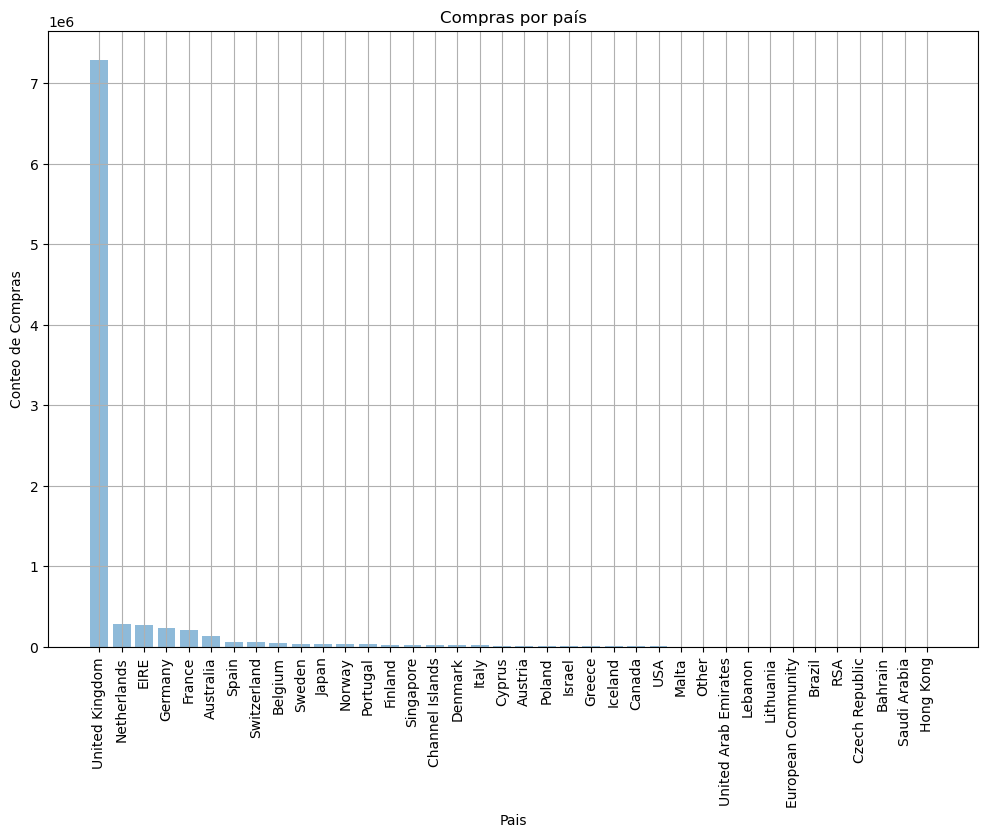

In [275]:
plt.figure(figsize=(12, 8))
plt.bar(monto_total_por_pais['País'], monto_total_por_pais['Monto Total'], alpha=0.5, )
plt.title('Compras por país')
plt.xlabel('Pais')
plt.ylabel('Conteo de Compras')
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

### Análisis de número de facturas por mes

In [276]:
# Crear una nueva columna 'Month' para el mes de cada factura
data_filtered2['Month'] = data_filtered2['invoice_date'].dt.month

# Conteo de facturas por mes
facturas_por_mes = data_filtered2.groupby('Month')['invoice_no'].nunique().reset_index()
facturas_por_mes.columns = ['Mes', 'Número de Facturas']

# Mostrar tabla de número de facturas por mes
print("Número de facturas generadas por mes:")
facturas_por_mes

Número de facturas generadas por mes:


,Mes,Número de Facturas
0,1,987
1,2,998
2,3,1321
3,4,1149
4,5,1555
5,6,1393
6,7,1331
7,8,1281
8,9,1756
9,10,1929


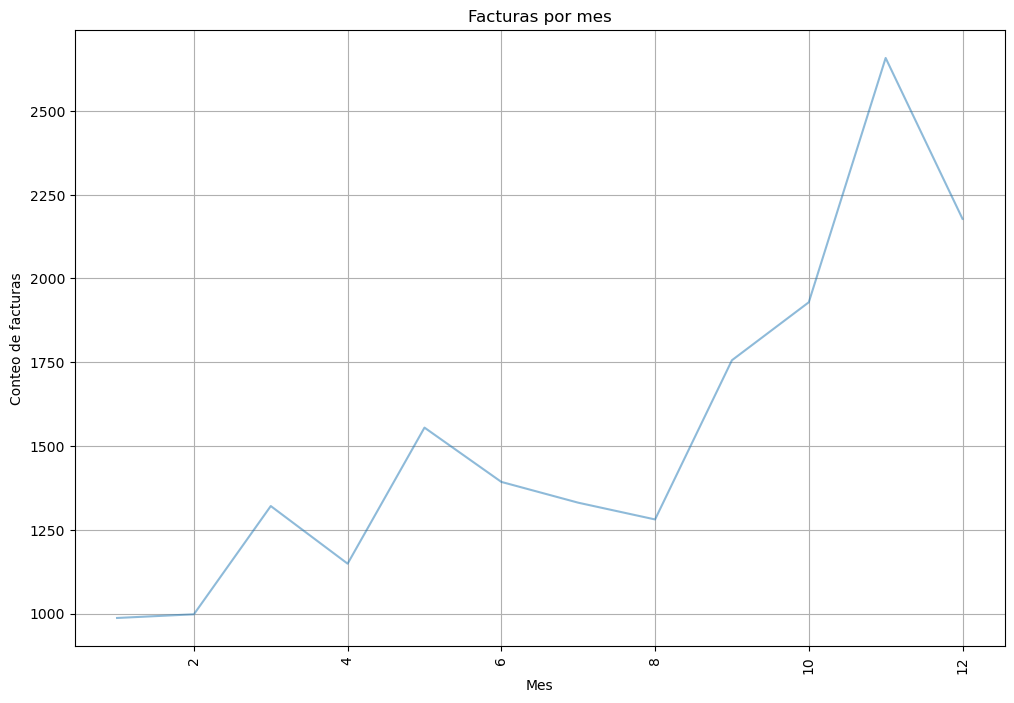

In [277]:
plt.figure(figsize=(12, 8))
plt.plot(facturas_por_mes['Mes'], facturas_por_mes['Número de Facturas'], alpha=0.5, )
plt.title('Facturas por mes')
plt.xlabel('Mes')
plt.ylabel('Conteo de facturas')
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

### Análisis de la Cantidad de Clientes Nuevos por mes

In [278]:
# Ordenar los datos por fecha de factura
data_filtered2 = data_filtered2.sort_values(by='invoice_date')

# Encontrar la primera compra de cada cliente
primer_compra_por_cliente = data_filtered2.groupby('customer_id')['invoice_date'].min().reset_index()

# Crear una nueva columna 'month_first_purchase' para el mes de la primera compra de cada cliente
primer_compra_por_cliente['month_first_purchase'] = primer_compra_por_cliente['invoice_date'].dt.month

# Contar la cantidad de clientes nuevos por mes
clientes_nuevos_por_mes = primer_compra_por_cliente.groupby('month_first_purchase').size().reset_index()
clientes_nuevos_por_mes.columns = ['Mes', 'Clientes Nuevos']

# Mostrar tabla de cantidad de clientes nuevos por mes
print("Cantidad de clientes nuevos por mes:")
clientes_nuevos_por_mes

Cantidad de clientes nuevos por mes:


,Mes,Clientes Nuevos
0,1,417
1,2,380
2,3,452
3,4,300
4,5,284
5,6,242
6,7,188
7,8,169
8,9,299
9,10,358


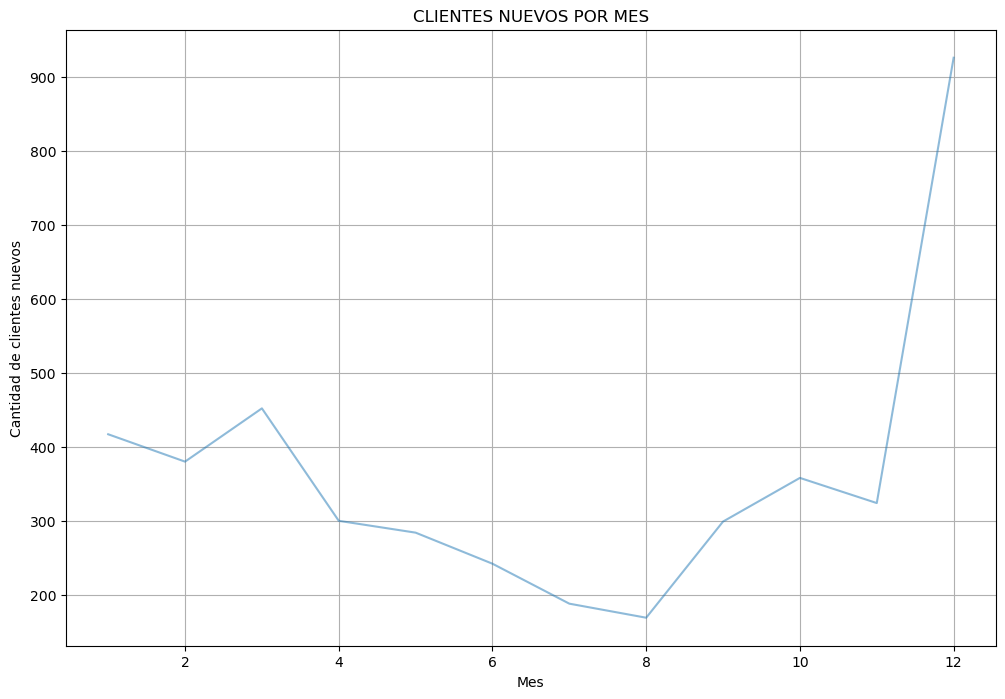

In [279]:
plt.figure(figsize=(12, 8))
plt.plot(clientes_nuevos_por_mes['Mes'], clientes_nuevos_por_mes['Clientes Nuevos'], alpha=0.5, )
plt.title('CLIENTES NUEVOS POR MES')
plt.xlabel('Mes')
plt.ylabel('Cantidad de clientes nuevos')
plt.grid(True)
plt.xticks(rotation = 0)
plt.show()

### Analisis del monto total de ventas por mes

In [280]:
# Calcular el monto total de ventas por mes
ventas_por_mes = data_filtered2.groupby('Month')['amount'].sum().reset_index()
ventas_por_mes.columns = ['Mes', 'Monto Total de Ventas']

# Mostrar tabla de monto total de ventas por mes
print("Monto total de ventas por mes:")
ventas_por_mes

Monto total de ventas por mes:


,Mes,Monto Total de Ventas
0,1,568101.310
1,2,446084.920
2,3,594081.760
3,4,468374.331
4,5,677355.150
5,6,660046.050
6,7,598962.901
7,8,644051.040
8,9,950690.202
9,10,1035642.450


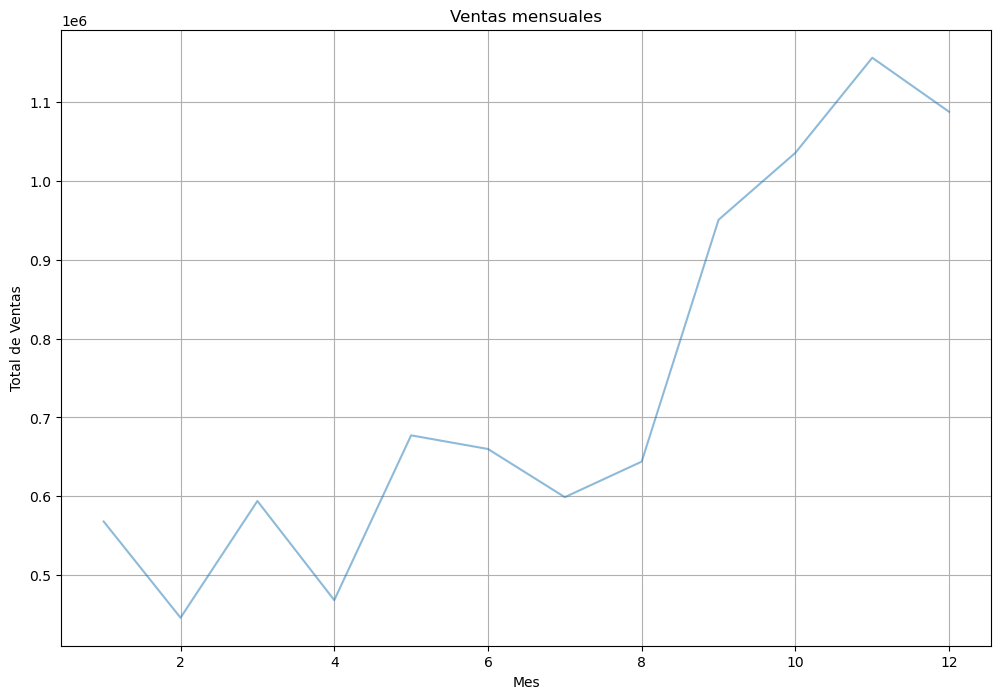

In [281]:
plt.figure(figsize=(12, 8))
plt.plot(ventas_por_mes['Mes'], ventas_por_mes['Monto Total de Ventas'], alpha=0.5, )
plt.title('Ventas mensuales')
plt.xlabel('Mes')
plt.ylabel('Total de Ventas')
plt.grid(True)
plt.xticks(rotation = 0)
plt.show()

### Analisis de Clientes que mas han gastado

In [282]:
# Calcular el total gastado por cada cliente
total_gastado_por_cliente = data_filtered2.groupby('customer_id')['amount'].sum().reset_index()

# Ordenar los clientes por el monto total gastado de mayor a menor
clientes_mas_gastadores = total_gastado_por_cliente.sort_values(by='amount', ascending=False)

# Mostrar los 10 clientes que más han gastado
print("Clientes que más han gastado:")
clientes_mas_gastadores.sample(10)

Clientes que más han gastado:


,customer_id,amount
789,13396.0,1360.99
1917,14967.0,463.80
2639,15940.0,35.80
3078,16545.0,339.30
167,12557.0,11990.96
4124,17987.0,198.57
1973,15048.0,381.00
315,12732.0,236.26
1154,13904.0,332.64
3198,16714.0,1129.06


In [283]:
top_clients = clientes_mas_gastadores.head(10)
top_clients

,customer_id,amount
1690,14646.0,280206.02
4202,18102.0,259657.30
3729,17450.0,194390.79
3009,16446.0,168472.50
1880,14911.0,143711.17
55,12415.0,124914.53
1334,14156.0,117210.08
3772,17511.0,91062.38
2703,16029.0,80850.84
0,12346.0,77183.60


In [284]:
#Analizamos perfil de cada clinte 
cliente = top_clients['customer_id'].tolist()
cliente

[14646.0,
 18102.0,
 17450.0,
 16446.0,
 14911.0,
 12415.0,
 14156.0,
 17511.0,
 16029.0,
 12346.0]

In [285]:
datos_clientes_top = (data_filtered2.query(f'customer_id in {cliente}'))
datos_clientes_top

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,amount,Month
177,536386,85099B,JUMBO BAG RED RETROSPOT,100,2019-12-01 09:57:00,1.65,16029.0,United Kingdom,165.00,12
176,536386,85099C,JUMBO BAG BAROQUE BLACK WHITE,100,2019-12-01 09:57:00,1.65,16029.0,United Kingdom,165.00,12
175,536386,84880,WHITE WIRE EGG HOLDER,36,2019-12-01 09:57:00,4.95,16029.0,United Kingdom,178.20,12
178,536387,79321,CHILLI LIGHTS,192,2019-12-01 09:58:00,3.82,16029.0,United Kingdom,733.44,12
179,536387,22780,LIGHT GARLAND BUTTERFILES PINK,192,2019-12-01 09:58:00,3.37,16029.0,United Kingdom,647.04,12
...,...,...,...,...,...,...,...,...,...,...
540060,581457,22189,CREAM HEART CARD HOLDER,324,2020-12-08 18:43:00,3.39,18102.0,United Kingdom,1098.36,12
540059,581457,22188,BLACK HEART CARD HOLDER,324,2020-12-08 18:43:00,2.31,18102.0,United Kingdom,748.44,12
540063,581457,23553,LANDMARK FRAME CAMDEN TOWN,120,2020-12-08 18:43:00,10.95,18102.0,United Kingdom,1314.00,12
540421,581483,23843,PAPER CRAFT LITTLE BIRDIE,80995,2020-12-09 09:15:00,2.08,16446.0,United Kingdom,168469.60,12


In [286]:
datos_clientes_top['region'].unique()

['United Kingdom', 'EIRE', 'Netherlands', 'Australia']
Categories (38, object): ['Australia', 'Austria', 'Bahrain', 'Belgium', ..., 'USA', 'United Arab Emirates', 'United Kingdom', 'Other']

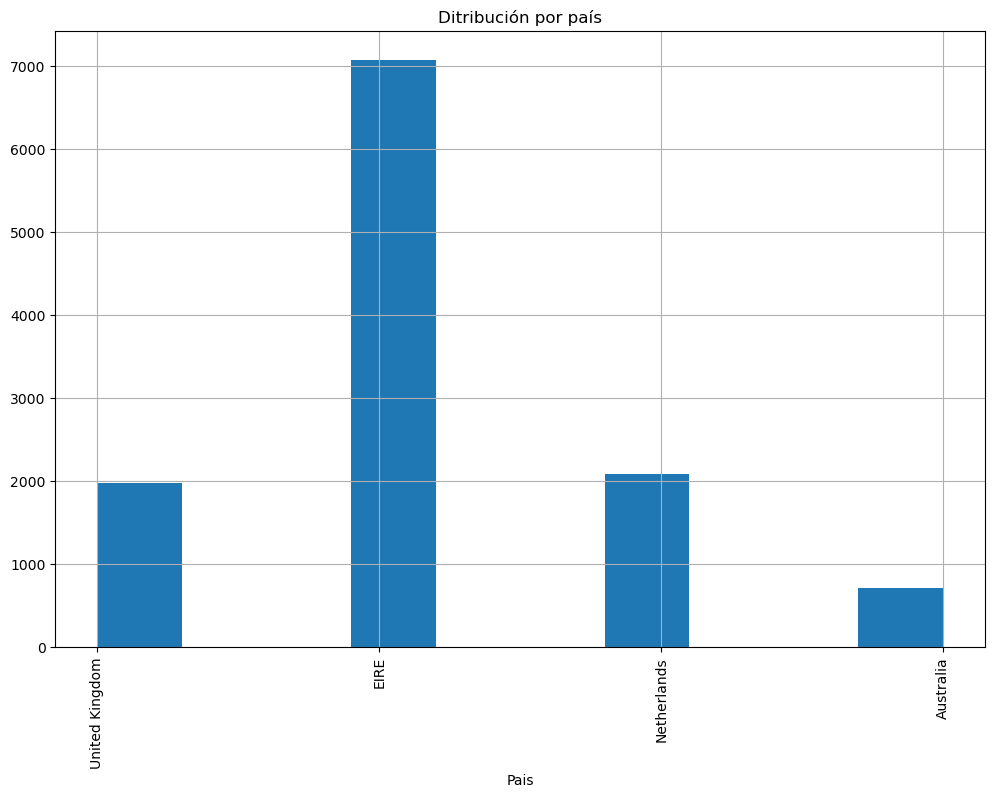

In [287]:
#Vemos de que país son dichos clientes 
plt.figure(figsize=(12, 8))
plt.hist(datos_clientes_top['region'])
plt.title('Ditribución por país')
plt.xlabel('Pais')
plt.grid(True)
plt.xticks(rotation = 90)
plt.show()

La mayoría de las compras provienen de Reino Unido, sin embargo la región con clientes que gastan más es EIRE

In [288]:
ventas_top = datos_clientes_top.groupby('Month')['amount'].sum().reset_index()
ventas_top.columns = ['Mes','Monto Total de Ventas']


In [289]:
ventas_top

,Mes,Monto Total de Ventas
0,1,157279.18
1,2,69451.38
2,3,89521.52
3,4,19961.26
4,5,110847.11
5,6,124301.75
6,7,84053.59
7,8,114828.38
8,9,206962.30
9,10,167976.12


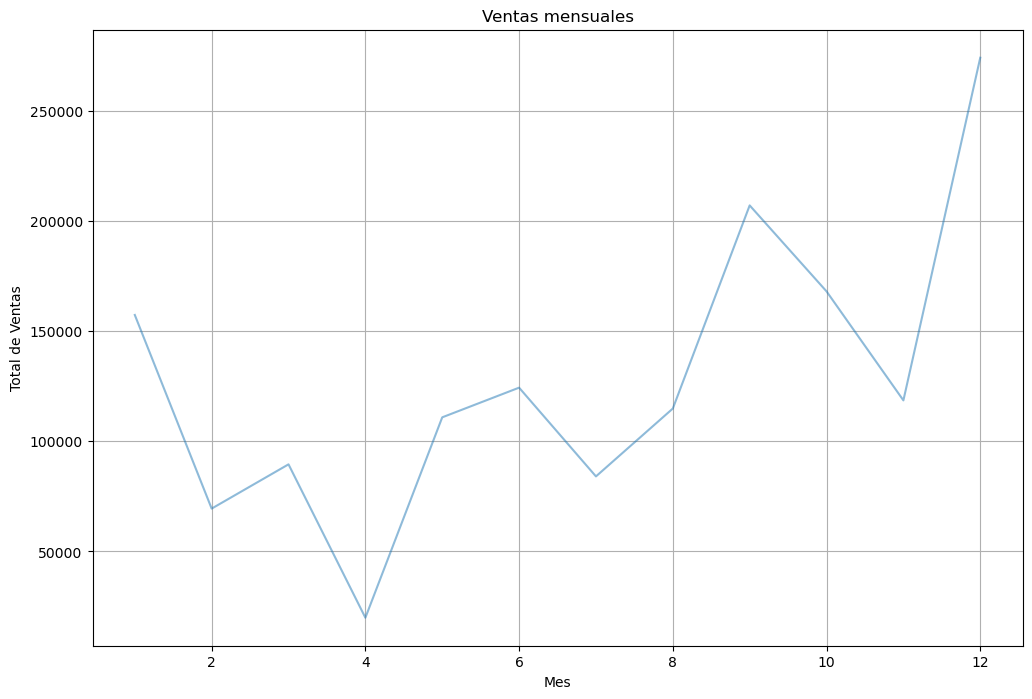

In [290]:
#Observamos en que fechas gastan más estos clientes 
plt.figure(figsize=(12, 8))
plt.plot(ventas_top['Mes'], ventas_top['Monto Total de Ventas'], alpha=0.5, )
plt.title('Ventas mensuales')
plt.xlabel('Mes')
plt.ylabel('Total de Ventas')
plt.grid(True)
plt.xticks(rotation = 0)
plt.show()

### Analisis de clientes que mas compras han realizado

In [291]:
# Calcular el número de compras por cliente
compras_por_cliente = data_filtered2.groupby('customer_id')['invoice_no'].nunique().reset_index()

# Ordenar los clientes por el número de compras de mayor a menor
clientes_mas_compras = compras_por_cliente.sort_values(by='invoice_no', ascending=False)

# Mostrar los 10 clientes que más compras han realizado
print("Clientes que más compras han realizado:")
clientes_mas_compras.head(10)

Clientes que más compras han realizado:


,customer_id,invoice_no
326,12748.0,210
1880,14911.0,201
4011,17841.0,124
562,13089.0,97
1662,14606.0,93
2177,15311.0,91
481,12971.0,86
1690,14646.0,74
2703,16029.0,63
796,13408.0,62


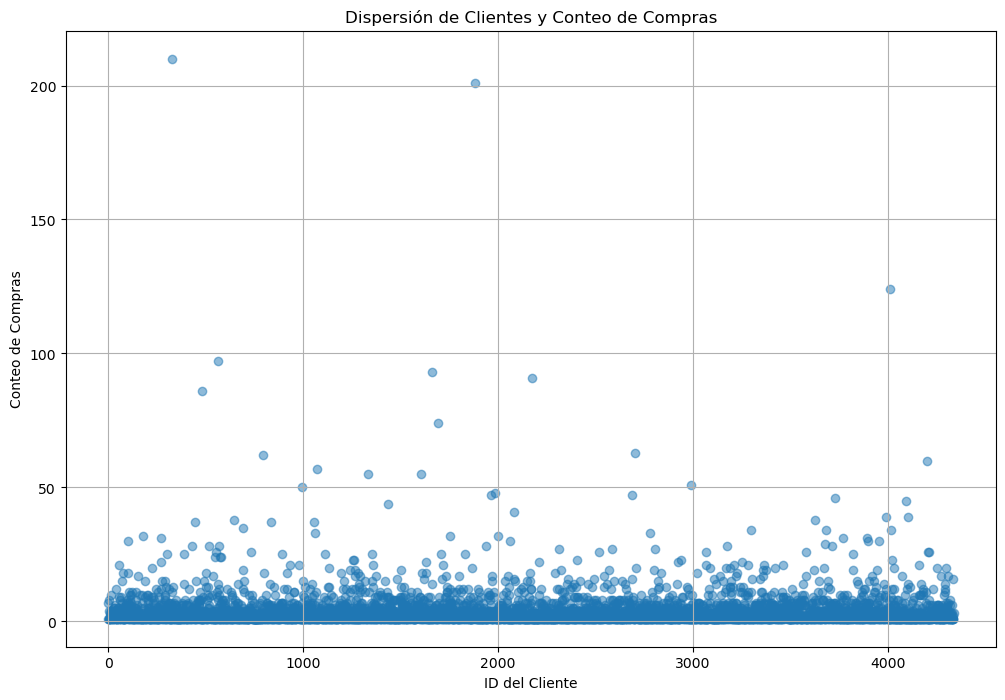

In [292]:
plt.figure(figsize=(12, 8))
plt.scatter(clientes_mas_compras.index, clientes_mas_compras['invoice_no'], alpha=0.5)
plt.title('Dispersión de Clientes y Conteo de Compras')
plt.xlabel('ID del Cliente')
plt.ylabel('Conteo de Compras')
plt.grid(True)
plt.show()


In [293]:
print(np.percentile(clientes_mas_compras['invoice_no'],[90,95,99]))

[ 9. 13. 30.]


No más del 1% de clientes tiene más de 30 compras y menos del 5% tiene más de 13 compras. Es decir que todos aquellos puntos que vemos en el gráfico por encima de 30 pedidos, son datos con anomalías.

### Analisis de comportamiento de clientes a lo largo del tiempo

In [294]:
# Agregamos columnas de fecha para facilitar el agrupamiento
data['date'] = data_filtered2['invoice_date'].dt.date

In [295]:
# Contar el número de compras por usuario
purchase_counts = data_filtered2.groupby('customer_id').size().reset_index(name='purchase_count')

# Calcular el número de usuarios con una única compra y con más de una compra
one_time_buyers = purchase_counts[purchase_counts['purchase_count'] == 1].shape[0]
repeat_buyers = purchase_counts[purchase_counts['purchase_count'] > 1].shape[0]
total_buyers = one_time_buyers + repeat_buyers

# Calcular el porcentaje de usuarios que no vuelven a comprar
percentage_one_time_buyers = (one_time_buyers / total_buyers) * 100

# Calcular el factor de stickiness
stickiness_factor = (repeat_buyers / total_buyers) * 100

# Resultados
print(f"Porcentaje de usuarios que no vuelven a comprar: {percentage_one_time_buyers:.2f}%")
print(f"Factor de stickiness: {stickiness_factor:.2f}%")

Porcentaje de usuarios que no vuelven a comprar: 1.66%
Factor de stickiness: 98.34%


In [296]:
#Obtenemos datos de fecha 
data_filtered2['invoice_month'] = data_filtered2['invoice_date'].dt.month
data_filtered2['invoice_week']  = data_filtered2['invoice_date'].dt.isocalendar().week
data_filtered2['invoice_day'] = data_filtered2['invoice_date'].dt.day
data_filtered2['invoice_year'] = data_filtered2['invoice_date'].dt.year

In [297]:
#Calculamos las tres métricas para conocer número de usuarios activos:
#DAU (usuarios activos diarios)
dau_total= data_filtered2.groupby('invoice_date').agg({'customer_id': 'nunique'}).mean()
#WAU (usuarios activos semanales)
wau_total = data_filtered2.groupby(['invoice_year', 'invoice_week']).agg({'customer_id': 'nunique'}).mean()
#MAU (usuarios activos mensuales)
mau_total = data_filtered2.groupby(['invoice_year', 'invoice_month']).agg({'customer_id': 'nunique'}).mean()

print(int(dau_total) , ' usuarios compran reguralemnte cada día.')
print(int(wau_total) , ' usuarios compran reguralemnte cada semana.')
print(int(mau_total) , ' personas usan el servicio cada mes.')

1  usuarios compran reguralemnte cada día.
288  usuarios compran reguralemnte cada semana.
1004  personas usan el servicio cada mes.


C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7012\3299674560.py:9: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(int(dau_total) , ' usuarios compran reguralemnte cada día.')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7012\3299674560.py:10: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(int(wau_total) , ' usuarios compran reguralemnte cada semana.')
C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7012\3299674560.py:11: FutureWarning: Calling int on a single element Series is deprecated and will raise a TypeError in the future. Use int(ser.iloc[0]) instead
  print(int(mau_total) , ' personas usan el servicio cada mes.')


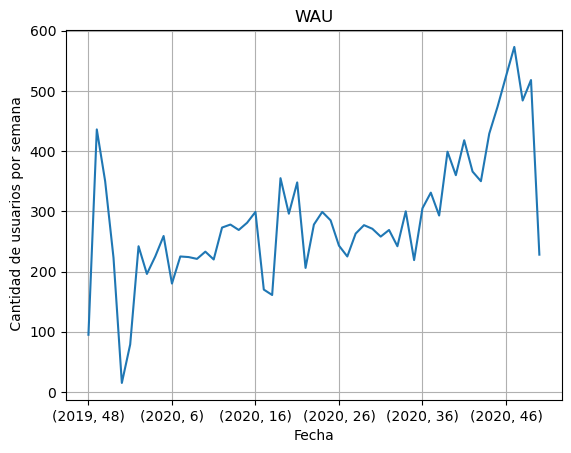

In [298]:
wau_graph = data_filtered2.groupby(['invoice_year', 'invoice_week']).agg({'customer_id': 'nunique'})
wau_graph.plot( title= 'WAU', 
                 xlabel = 'Fecha',
                 ylabel = ' Cantidad de usuarios por semana', 
                 legend = False, 
                 grid = True)
plt.show()

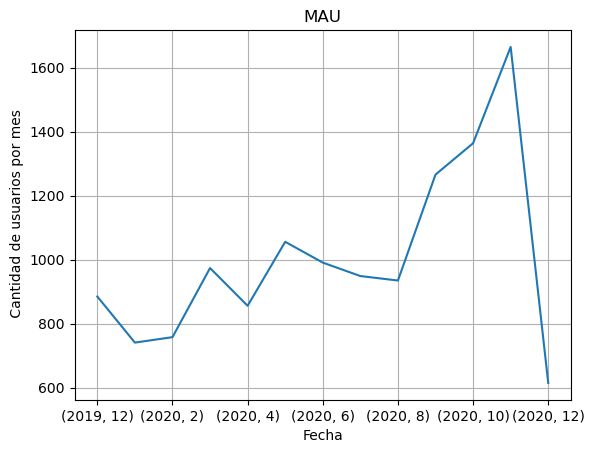

In [299]:
mau_graph = data_filtered2.groupby(['invoice_year', 'invoice_month']).agg({'customer_id': 'nunique'})
mau_graph.plot( title= 'MAU', 
                 xlabel = 'Fecha',
                 ylabel = ' Cantidad de usuarios por mes', 
                 legend = False, 
                 grid = True)
plt.show()

### Analisis de comportamiento de clientes a lo largo del tiempo

In [300]:
# Agregamos columnas de fecha para facilitar el agrupamiento
data_filtered2['date'] = data['invoice_date'].dt.date
data_filtered2['month'] = data_filtered2['invoice_date'].dt.to_period('M').dt.to_timestamp()
data_filtered2['week'] = data_filtered2['invoice_date'].dt.to_period('W-SUN').dt.to_timestamp()  # Comienza la semana el domingo

In [301]:
data_filtered2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 392732 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   invoice_no     392732 non-null  object        
 1   stock_code     392732 non-null  object        
 2   description    392732 non-null  category      
 3   quantity       392732 non-null  int64         
 4   invoice_date   392732 non-null  datetime64[ns]
 5   unit_price     392732 non-null  float64       
 6   customer_id    392732 non-null  float64       
 7   region         392732 non-null  category      
 8   amount         392732 non-null  float64       
 9   Month          392732 non-null  int32         
 10  invoice_month  392732 non-null  int32         
 11  invoice_week   392732 non-null  UInt32        
 12  invoice_day    392732 non-null  int32         
 13  invoice_year   392732 non-null  int32         
 14  date           392732 non-null  object        
 15  month

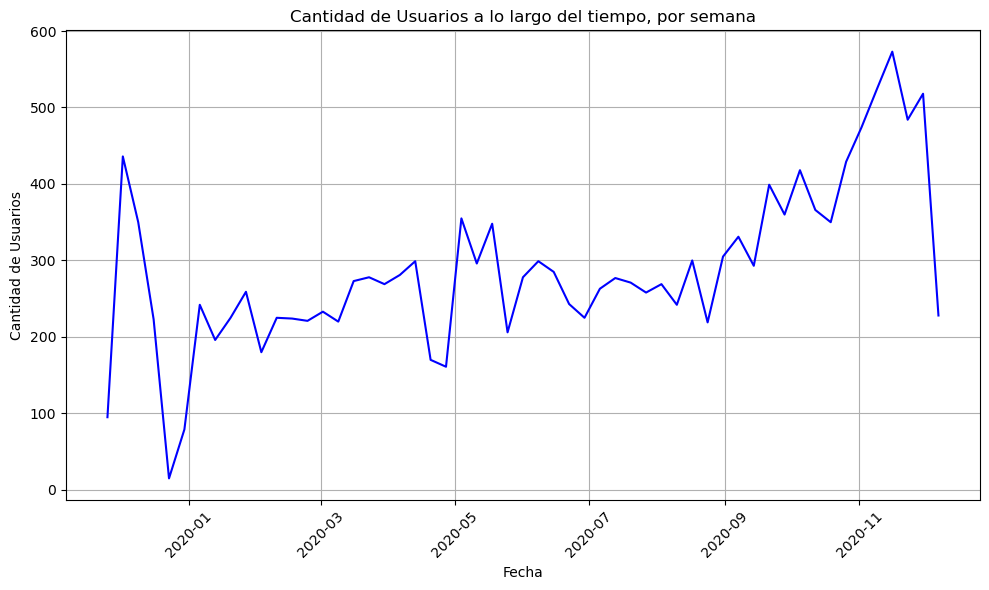

In [302]:
users_per_week = data_filtered2.groupby('week')['customer_id'].nunique()
#Trazamos el gráfico

# Gráfico de línea de usuarios únicos por semana
plt.figure(figsize=(10, 6))
plt.plot(users_per_week, linestyle='-', color='b')
plt.title('Cantidad de Usuarios a lo largo del tiempo, por semana')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Usuarios')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

El comportamiento es muy fluctuante, con tendencia a incrementar para finales de año, como bien sabemos, es la temporada en el que la gente modifica su comportamiento de compras

### Analisis de comportamiento de facturas a lo largo del tiempo

In [303]:
# Pedidos únicos por día
invoices_per_day = data_filtered2.groupby('date')['invoice_no'].nunique()

#Obtenemos las medias(promedios) para cada unidad de medida de tiempo

print('Promedio de facturas únicas por día:', invoices_per_day.mean())

Promedio de facturas únicas por día: 60.773770491803276


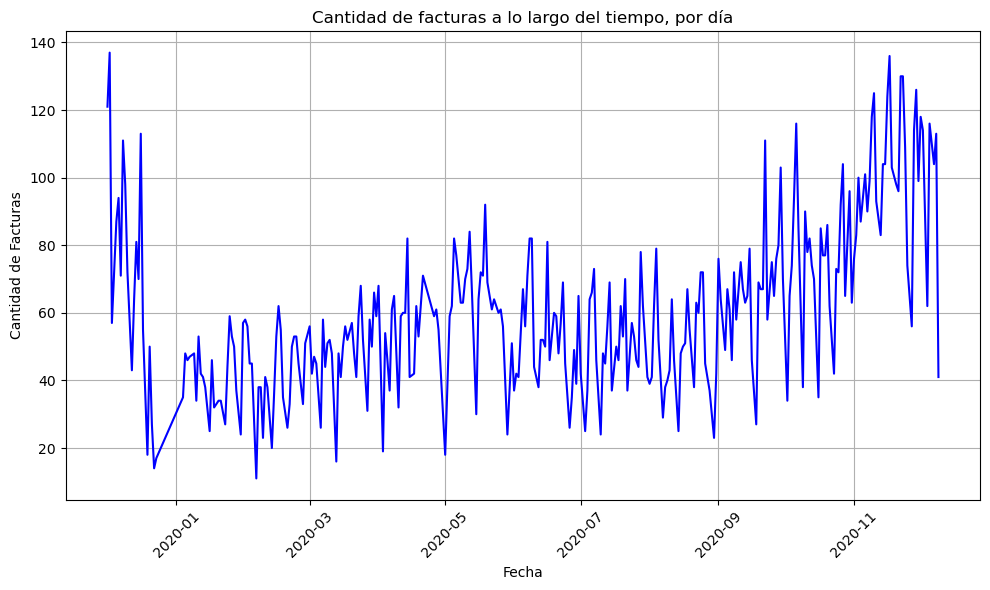

In [304]:
#Trazamos el gráfico

# Gráfico de línea de facturas únicas por día (compras)
plt.figure(figsize=(10, 6))
plt.plot(invoices_per_day, linestyle='-', color='b')
plt.title('Cantidad de facturas a lo largo del tiempo, por día')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de Facturas')
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Mostrar el gráfico
plt.show()

Nuevamente observamos el comportamiento alcista a finales e inicios de año.

### Análisis número de facturas por prodcuto

In [305]:
# Conteo de facturas por producto (description)
facturas_por_producto = data_filtered2.groupby('description')['invoice_no'].nunique().reset_index()
facturas_por_producto.columns = ['Producto', 'Numero de Facturas']
facturas_por_producto = facturas_por_producto.sort_values('Numero de Facturas', ascending = False)
#mostramos 10 primeras filas para obtener los 10 prodcutos más populares
facturas_por_producto.head(20)

,Producto,Numero de Facturas
3911,WHITE HANGING HEART T-LIGHT HOLDER,1971
2911,REGENCY CAKESTAND 3 TIER,1704
1863,JUMBO BAG RED RETROSPOT,1600
2467,PARTY BUNTING,1380
244,ASSORTED COLOUR BIRD ORNAMENT,1375
2050,LUNCH BAG RED RETROSPOT,1288
3191,SET OF 3 CAKE TINS PANTRY DESIGN,1146
2749,POSTAGE,1099
2042,LUNCH BAG BLACK SKULL.,1052
2391,PACK OF 72 RETROSPOT CAKE CASES,1029


Observamos que las categorias principales son las siguientes: 
- LIGHT HOLDER 
- BAG
- PARTY BUNTING	
- ORNAMENT
- CAKE TINS
- POSTAGE	

In [306]:
#Filtramos el DF con la lista de las catgorias 
#Creamos una nueva lista 
categorias_populares = ['LIGHT HOLDER','BAG','PARTY BUNTING', 'ORNAMENT', 'CAKE TINS','POSTAGE']
#Filtramos
df_categorias = data_filtered2[data_filtered2.description.str.contains('|'.join(categorias_populares))]

df_categorias

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,amount,Month,invoice_month,invoice_week,invoice_day,invoice_year,date,month,week
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2019-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,12,48,1,2019,2019-12-01,2019-12-01,2019-11-25
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2019-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,12,12,48,1,2019,2019-12-01,2019-12-01,2019-11-25
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2019-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,12,12,48,1,2019,2019-12-01,2019-12-01,2019-11-25
38,536370,22661,CHARLOTTE BAG DOLLY GIRL DESIGN,20,2019-12-01 08:45:00,0.85,12583.0,France,17.00,12,12,48,1,2019,2019-12-01,2019-12-01,2019-11-25
45,536370,POST,POSTAGE,3,2019-12-01 08:45:00,18.00,12583.0,France,54.00,12,12,48,1,2019,2019-12-01,2019-12-01,2019-11-25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541888,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2020-12-09 12:31:00,0.95,15804.0,United Kingdom,11.40,12,12,50,9,2020,2020-12-09,2020-12-01,2020-12-07
541872,581585,22460,EMBOSSED GLASS TEALIGHT HOLDER,12,2020-12-09 12:31:00,1.25,15804.0,United Kingdom,15.00,12,12,50,9,2020,2020-12-09,2020-12-01,2020-12-07
541875,581585,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2020-12-09 12:31:00,1.69,15804.0,United Kingdom,27.04,12,12,50,9,2020,2020-12-09,2020-12-01,2020-12-07
541876,581585,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,24,2020-12-09 12:31:00,0.85,15804.0,United Kingdom,20.40,12,12,50,9,2020,2020-12-09,2020-12-01,2020-12-07


In [307]:
#Agregar coluamn categoria 
categorias = ['LIGHT HOLDER','BAG','PARTY BUNTING', 'ORNAMENT', 'CAKE TINS','POSTAGE']
#Filtramos
cond = [df_categorias['description'].str.contains(i,case=False) for i in categorias]
df_categorias['category'] =np.select(cond,categorias)
df_categorias

C:\Users\USUARIO\AppData\Local\Temp\ipykernel_7012\3883605879.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_categorias['category'] =np.select(cond,categorias)


,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,amount,Month,invoice_month,invoice_week,invoice_day,invoice_year,date,month,week,category
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2019-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,12,12,48,1,2019,2019-12-01,2019-12-01,2019-11-25,LIGHT HOLDER
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2019-12-01 08:26:00,4.25,17850.0,United Kingdom,25.50,12,12,48,1,2019,2019-12-01,2019-12-01,2019-11-25,LIGHT HOLDER
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2019-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,12,12,48,1,2019,2019-12-01,2019-12-01,2019-11-25,ORNAMENT
38,536370,22661,CHARLOTTE BAG DOLLY GIRL DESIGN,20,2019-12-01 08:45:00,0.85,12583.0,France,17.00,12,12,48,1,2019,2019-12-01,2019-12-01,2019-11-25,BAG
45,536370,POST,POSTAGE,3,2019-12-01 08:45:00,18.00,12583.0,France,54.00,12,12,48,1,2019,2019-12-01,2019-12-01,2019-11-25,POSTAGE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
541888,581585,23145,ZINC T-LIGHT HOLDER STAR LARGE,12,2020-12-09 12:31:00,0.95,15804.0,United Kingdom,11.40,12,12,50,9,2020,2020-12-09,2020-12-01,2020-12-07,LIGHT HOLDER
541872,581585,22460,EMBOSSED GLASS TEALIGHT HOLDER,12,2020-12-09 12:31:00,1.25,15804.0,United Kingdom,15.00,12,12,50,9,2020,2020-12-09,2020-12-01,2020-12-07,LIGHT HOLDER
541875,581585,84879,ASSORTED COLOUR BIRD ORNAMENT,16,2020-12-09 12:31:00,1.69,15804.0,United Kingdom,27.04,12,12,50,9,2020,2020-12-09,2020-12-01,2020-12-07,ORNAMENT
541876,581585,84945,MULTI COLOUR SILVER T-LIGHT HOLDER,24,2020-12-09 12:31:00,0.85,15804.0,United Kingdom,20.40,12,12,50,9,2020,2020-12-09,2020-12-01,2020-12-07,LIGHT HOLDER


### Análisis de ingresos por categoria 

In [308]:
# Conteo de facturas por país (region)
facturas_por_categoria = df_categorias.groupby('category')['invoice_no'].nunique().reset_index()
facturas_por_categoria.columns = ['Categoria', 'Numero de Facturas']
facturas_por_categoria

,Categoria,Numero de Facturas
0,BAG,8122
1,CAKE TINS,2012
2,LIGHT HOLDER,4991
3,ORNAMENT,1375
4,PARTY BUNTING,1529
5,POSTAGE,1115


### Analisis de categorias a lo largo del tiempo 

Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77)
Axes(0.125,0.11;0.775x0.77) Text(0.5, 1.0, 'Ventas por categoria') Text(0.5, 0, 'Mes') Text(0, 0.5, 'Total de ventas')


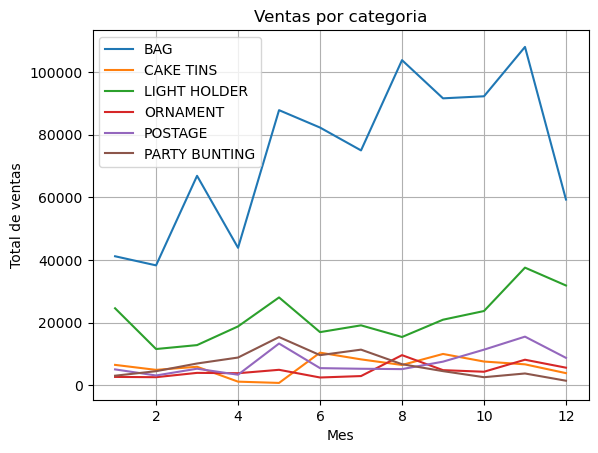

<Figure size 1500x2000 with 0 Axes>

In [309]:
#Hacemos los calculos para ingresos por categoria 
a = ['BAG']
filter= df_categorias[df_categorias['category'].isin(a)][['Month','amount']]
sales=filter.groupby('Month')['amount'].sum()
print(sales.plot(legend=True,label='BAG'))

a = ['CAKE TINS']
filter= df_categorias[df_categorias['category'].isin(a)][['Month','amount']]
sales=filter.groupby('Month')['amount'].sum()
print(sales.plot(legend=True,label='CAKE TINS'))

a = ['LIGHT HOLDER']
filter= df_categorias[df_categorias['category'].isin(a)][['Month','amount']]
sales=filter.groupby('Month')['amount'].sum()
print(sales.plot(legend=True,label='LIGHT HOLDER', grid=True))

a = ['ORNAMENT']
filter= df_categorias[df_categorias['category'].isin(a)][['Month','amount']]
sales=filter.groupby('Month')['amount'].sum()
print(sales.plot(legend=True,label='ORNAMENT', grid=True))

a = ['POSTAGE']
filter= df_categorias[df_categorias['category'].isin(a)][['Month','amount']]
sales=filter.groupby('Month')['amount'].sum()
print(sales.plot(legend=True,label='POSTAGE', grid=True))


a = ['PARTY BUNTING']
filter= df_categorias[df_categorias['category'].isin(a)][['Month','amount']]
sales=filter.groupby('Month')['amount'].sum()
print(sales.plot(legend=True,label='PARTY BUNTING', grid=True),
plt.title('Ventas por categoria'),
plt.xlabel('Mes'),
plt.ylabel('Total de ventas'))
plt.figure(figsize=(15,20))
plt.show()


### Calculo de LTV 

Primero calcualamos el tamaño promedio de compra 

In [310]:
# Agrupar por invoice_no y sumar el amount para cada invoice
grouped_invoices = data_filtered2.groupby('invoice_no').agg({'amount': 'sum'})

# Calcular el tamaño promedio de compra
average_purchase_size = grouped_invoices['amount'].mean()

print(f'Tamaño promedio de compra: {average_purchase_size}')

Tamaño promedio de compra: 479.4566731765214


Ahora, calcularemos el LTV.

In [311]:
#Ahora recuperaremos el mes de la primera compra de cada cliente

# Identificar la primera compra de cada usuario
first_orders = data_filtered2.groupby('customer_id')['date'].min().reset_index()
first_orders.columns = ['customer_id', 'first_order']

# Extraer el mes y el año de la primera compra
first_orders['first_order'] = first_orders['first_order'].astype('datetime64[ns]')
first_orders['first_order_month'] = first_orders['first_order'].dt.to_period('M')

# Mostrar los primeros registros del DataFrame resultante
print(first_orders.head())

   customer_id first_order first_order_month
0      12346.0  2020-01-18           2020-01
1      12347.0  2019-12-07           2019-12
2      12348.0  2019-12-16           2019-12
3      12349.0  2020-11-21           2020-11
4      12350.0  2020-02-02           2020-02


In [312]:
#Calcularemos el número de nuevos clientes (n_buyers) para cada mes:

cohort_sizes = first_orders.groupby('first_order_month').agg({'customer_id': 'nunique'}).reset_index()
cohort_sizes.columns = ['first_order_month', 'n_buyers']
cohort_sizes.head()

,first_order_month,n_buyers
0,2019-12,885
1,2020-01,417
2,2020-02,380
3,2020-03,452
4,2020-04,300


In [313]:
#Creemos cohortes. Vamos a agregar los meses de la primera compra de los clientes a la tabla de facturas
data_complete = pd.merge(data_filtered2,first_orders, on='customer_id')
data_complete.sample(20)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,amount,Month,invoice_month,invoice_week,invoice_day,invoice_year,date,month,week,first_order,first_order_month
383836,575491,22208,WOOD STAMP SET THANK YOU,5,2020-11-09 17:47:00,0.83,15531.0,United Kingdom,4.15,11,11,46,9,2020,2020-11-09,2020-11-01,2020-11-09,2020-11-09,2020-11
306767,563847,23328,SET 6 SCHOOL MILK BOTTLES IN CRATE,4,2020-08-19 14:49:00,3.75,16139.0,United Kingdom,15.00,8,8,34,19,2020,2020-08-19,2020-08-01,2020-08-17,2020-05-17,2020-05
330426,560106,22727,ALARM CLOCK BAKELIKE RED,2,2020-07-14 20:01:00,3.75,17554.0,United Kingdom,7.50,7,7,29,14,2020,2020-07-14,2020-07-01,2020-07-13,2020-07-14,2020-07
28869,578289,22273,FELTCRAFT DOLL MOLLY,1,2020-11-23 14:07:00,2.95,17841.0,United Kingdom,2.95,11,11,48,23,2020,2020-11-23,2020-11-01,2020-11-23,2019-12-01,2019-12
380249,580097,23444,Next Day Carriage,1,2020-12-01 14:58:00,15.00,14216.0,United Kingdom,15.00,12,12,49,1,2020,2020-12-01,2020-12-01,2020-11-30,2020-11-02,2020-11
152711,547203,21668,RED STRIPE CERAMIC DRAWER KNOB,12,2020-03-21 13:51:00,1.25,17146.0,United Kingdom,15.00,3,3,12,21,2020,2020-03-21,2020-03-01,2020-03-16,2019-12-16,2019-12
67653,547073,84508C,BLUE CIRCLES DESIGN TEDDY,2,2020-03-20 14:23:00,2.55,17211.0,United Kingdom,5.10,3,3,12,20,2020,2020-03-20,2020-03-01,2020-03-16,2019-12-05,2019-12
137981,554963,22348,TEA BAG PLATE RED RETROSPOT,12,2020-05-27 15:32:00,0.85,14625.0,United Kingdom,10.20,5,5,22,27,2020,2020-05-27,2020-05-01,2020-05-25,2019-12-13,2019-12
197903,541675,22663,JUMBO BAG DOLLY GIRL DESIGN,10,2020-01-20 13:49:00,1.95,12402.0,Belgium,19.50,1,1,4,20,2020,2020-01-20,2020-01-01,2020-01-20,2020-01-20,2020-01
54458,547985,22621,TRADITIONAL KNITTING NANCY,12,2020-03-29 08:43:00,1.45,16455.0,United Kingdom,17.40,3,3,13,29,2020,2020-03-29,2020-03-01,2020-03-23,2019-12-03,2019-12


In [314]:
#Ahora vamos a agrupar la tabla de pedidos por mes de la primera compra y totalizar los ingresos. 
cohorts = data_complete.groupby(['first_order_month','month']).agg({'amount': 'sum'}).reset_index()
cohorts.head()

,first_order_month,month,amount
0,2019-12,2019-12-01,570422.73
1,2019-12,2020-01-01,275734.47
2,2019-12,2020-02-01,233390.47
3,2019-12,2020-03-01,302367.44
4,2019-12,2020-04-01,204034.38


In [315]:
#Agreguemos datos sobre cuántos usuarios realizaron sus primeras compras en cada mes 
report = pd.merge(cohort_sizes, cohorts, on='first_order_month')
report.head()

,first_order_month,n_buyers,month,amount
0,2019-12,885,2019-12-01,570422.73
1,2019-12,885,2020-01-01,275734.47
2,2019-12,885,2020-02-01,233390.47
3,2019-12,885,2020-03-01,302367.44
4,2019-12,885,2020-04-01,204034.38


In [316]:
#Calculamos la edad de la cohorte en lugar del mes del pedido
report['first_order_month'] = report['first_order_month'].dt.to_timestamp()
report['age'] = (
    report['month'] - report['first_order_month']
) / np.timedelta64(1, 'M')
report['age'] = report['age'].round().astype('int')

report.head()

,first_order_month,n_buyers,month,amount,age
0,2019-12-01,885,2019-12-01,570422.73,0
1,2019-12-01,885,2020-01-01,275734.47,1
2,2019-12-01,885,2020-02-01,233390.47,2
3,2019-12-01,885,2020-03-01,302367.44,3
4,2019-12-01,885,2020-04-01,204034.38,4


In [317]:
#Visualizaremos las cohortes como una tabla dinámica para aclarar las cosas

report['ltv']=report['amount'] / report['n_buyers']
output = report.pivot_table(index='first_order_month', columns='age', values='ltv')

output

age,0,1,2,3,4,5,6,7,8,9,10,11,12
first_order_month,,,,,,,,,,,,,
2019-12-01,644.545458,311.564373,263.718045,341.658124,230.547322,379.789480,354.427299,350.626023,374.012508,533.098452,514.665424,578.916475,209.447424
2020-01-01,701.119520,131.879760,151.455659,171.525396,194.220072,202.552926,168.041607,173.869113,172.351273,267.076019,295.570408,63.280647,NaN
2020-02-01,415.001553,76.151684,107.801237,126.724711,105.497816,89.883342,130.720289,163.928421,145.371947,170.233842,27.895316,NaN,NaN
2020-03-01,441.636438,66.460929,130.438960,94.555487,113.700088,88.412235,143.416261,156.025708,156.742522,28.232522,NaN,NaN,NaN
2020-04-01,406.030170,97.995300,83.428567,80.942633,87.510533,100.344133,95.019667,113.365367,21.106667,NaN,NaN,NaN,NaN
2020-05-01,435.701761,65.639789,70.970880,67.472430,97.720493,115.758239,116.789930,630.930387,NaN,NaN,NaN,NaN,NaN
2020-06-01,559.565289,60.902851,58.282521,127.680000,110.206198,175.748306,33.649669,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01,392.874473,62.711011,82.384947,92.510266,101.897979,32.131383,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,471.012663,123.868402,209.813491,263.240533,90.440000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


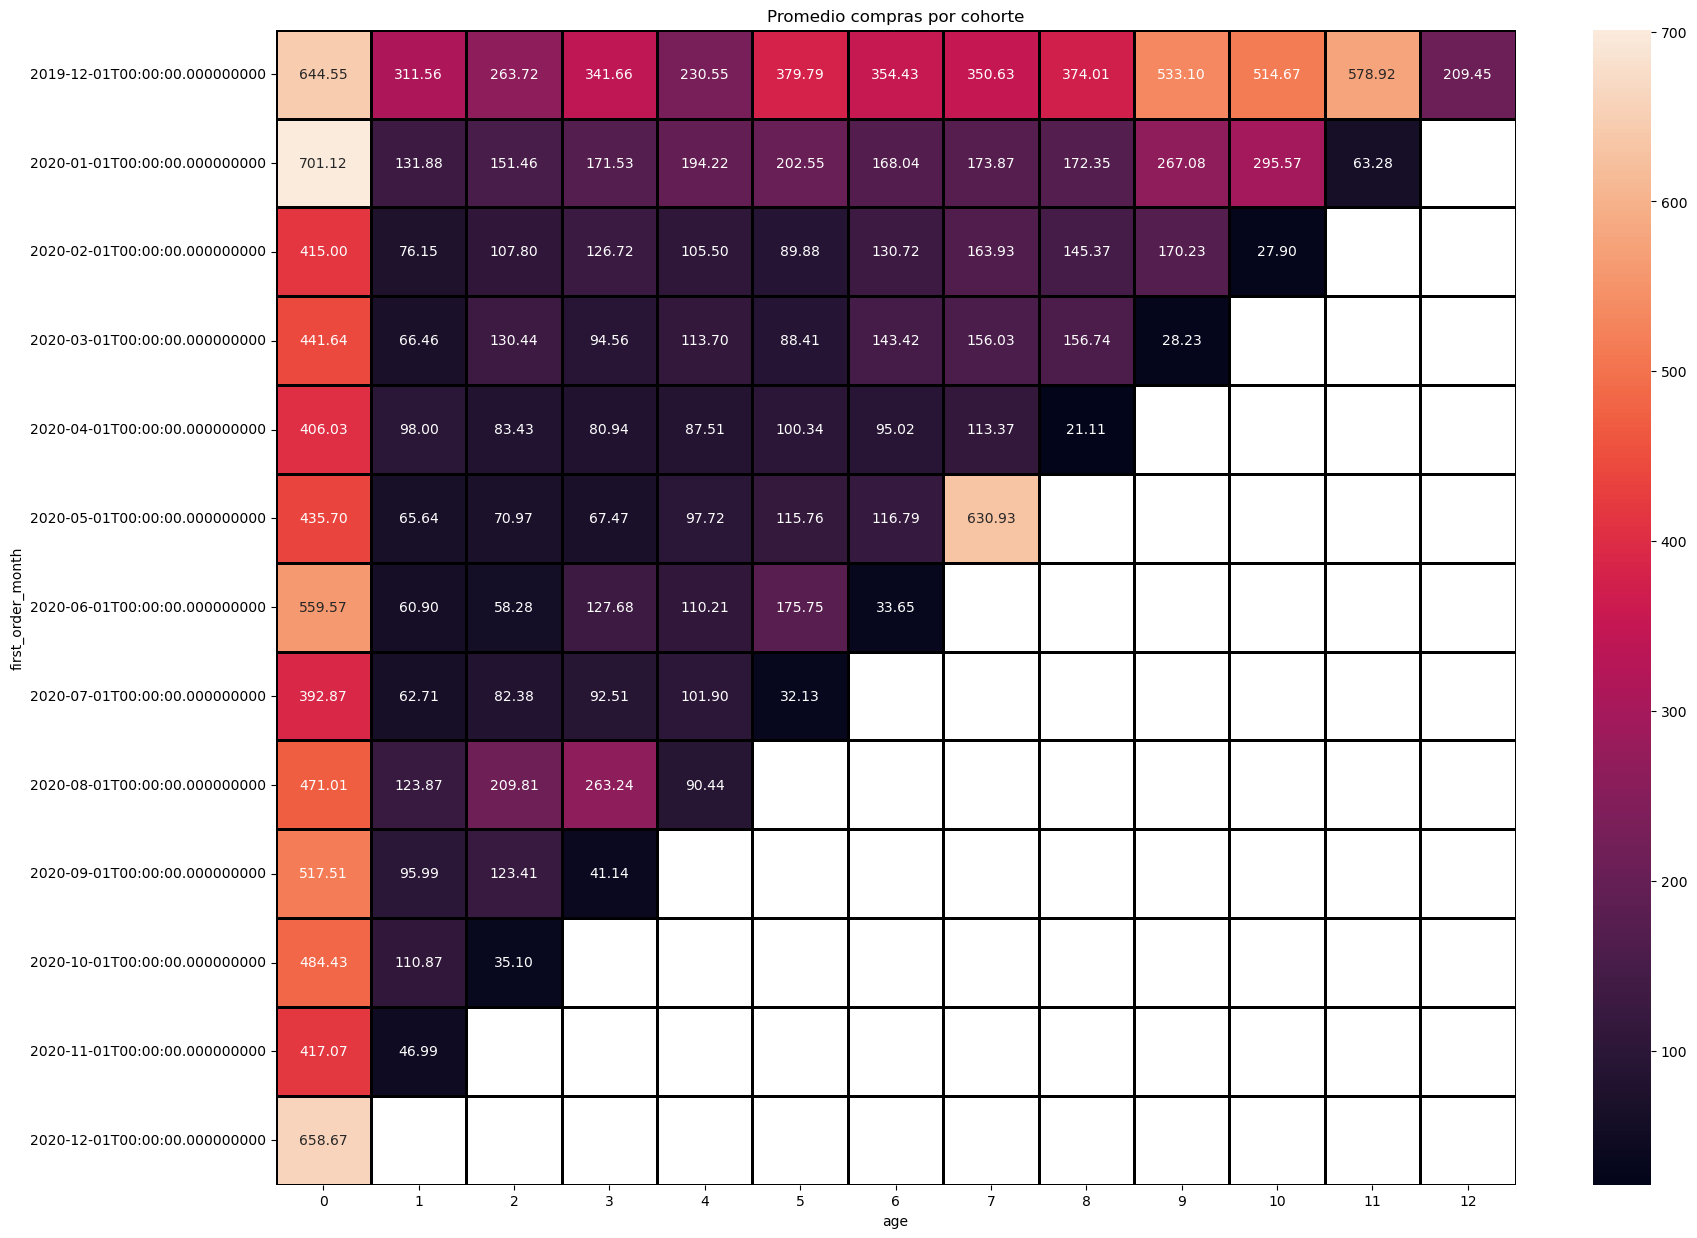

In [318]:
#Agregmos grafica heatmap para mejorar la visualizaición y evaluar el redimeinto de las cohortes y poder sacar conclusiones para cada mes
plt.figure(figsize=(20, 15))
plt.title('Promedio compras por cohorte')
sns.heatmap(
    output,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show()

Observando nuestra tabla pivote, nos damos cuenta que el primer mes en el que nuestros clientes realizan su primera compra, es en realidad, el mes más importante del cliclo de vida del cliente. Vemos que a partir del segundo mes, los ingresos por cliente fluctuan bastante, probablemente el periodo entre compras se vuelve más largo. Habrá que analizar los productos con mayor rotación.

### Análsis de cohortes con categorias más vendidas 

In [319]:
#Agrupamos los datos por de ususarios con que adquieren los prodcutos más vendidos obtenidos del df categories 
first_orders_product = df_categorias.groupby('customer_id')['date'].min().reset_index()
first_orders_product.columns = ['customer_id', 'first_order']

# Extraer el mes y el año de la primera compra
first_orders_product['first_order'] = first_orders_product['first_order'].astype('datetime64[ns]')
first_orders_product['first_order_month'] = first_orders_product['first_order'].dt.to_period('M')

# Mostrar los primeros registros del DataFrame resultante
print(first_orders_product.head())

   customer_id first_order first_order_month
0      12347.0  2019-12-07           2019-12
1      12348.0  2019-12-16           2019-12
2      12349.0  2020-11-21           2020-11
3      12350.0  2020-02-02           2020-02
4      12352.0  2020-03-01           2020-03


In [320]:
print(first_orders_product.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3509 entries, 0 to 3508
Data columns (total 3 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   customer_id        3509 non-null   float64       
 1   first_order        3509 non-null   datetime64[ns]
 2   first_order_month  3509 non-null   period[M]     
dtypes: datetime64[ns](1), float64(1), period[M](1)
memory usage: 82.4 KB
None


In [321]:
#Calcularemos el número de usuarios para cada mes:

cohort_sizes_product = first_orders_product.groupby('first_order_month').agg({'customer_id': 'nunique'}).reset_index()
cohort_sizes_product.columns = ['first_order_month', 'n_users']
cohort_sizes_product

,first_order_month,n_users
0,2019-12,611
1,2020-01,356
2,2020-02,289
3,2020-03,359
4,2020-04,236
5,2020-05,270
6,2020-06,219
7,2020-07,159
8,2020-08,141
9,2020-09,259


In [322]:
#Creemos cohortes. Vamos a agregar los meses de la primera compra de los clientes a la tabla de facturas
data_complete_product = pd.merge(df_categorias,first_orders_product, on='customer_id')
data_complete_product.sample(10)

,invoice_no,stock_code,description,quantity,invoice_date,unit_price,customer_id,region,amount,Month,invoice_month,invoice_week,invoice_day,invoice_year,date,month,week,category,first_order,first_order_month
10882,537593,21933,PINK VINTAGE PAISLEY PICNIC BAG,5,2019-12-07 12:21:00,2.95,14282.0,United Kingdom,14.75,12,12,49,7,2019,2019-12-07,2019-12-01,2019-12-02,BAG,2019-12-07,2019-12
41507,571205,22355,CHARLOTTE BAG SUKI DESIGN,10,2020-10-14 12:41:00,0.85,15620.0,United Kingdom,8.50,10,10,42,14,2020,2020-10-14,2020-10-01,2020-10-12,BAG,2020-05-03,2020-05
7802,544393,85099B,JUMBO BAG RED RETROSPOT,2,2020-02-18 11:56:00,1.95,16393.0,United Kingdom,3.90,2,2,8,18,2020,2020-02-18,2020-02-01,2020-02-17,BAG,2019-12-05,2019-12
3211,545838,22331,WOODLAND PARTY BAG + STICKER SET,1,2020-03-07 13:33:00,1.65,14606.0,United Kingdom,1.65,3,3,10,7,2020,2020-03-07,2020-03-01,2020-03-02,BAG,2019-12-01,2019-12
44083,562450,21931,JUMBO STORAGE BAG SUKI,10,2020-08-05 08:40:00,2.08,12562.0,France,20.80,8,8,32,5,2020,2020-08-05,2020-08-01,2020-08-03,BAG,2020-05-25,2020-05
53138,578326,23438,RED SPOT GIFT BAG LARGE,12,2020-11-23 17:45:00,1.25,16343.0,United Kingdom,15.00,11,11,48,23,2020,2020-11-23,2020-11-01,2020-11-23,BAG,2020-11-23,2020-11
24024,558754,20727,LUNCH BAG BLACK SKULL.,4,2020-07-03 12:10:00,1.65,15518.0,United Kingdom,6.60,7,7,27,3,2020,2020-07-03,2020-07-01,2020-06-29,BAG,2020-01-11,2020-01
2476,559807,22383,LUNCH BAG SUKI DESIGN,1,2020-07-12 14:48:00,1.65,17841.0,United Kingdom,1.65,7,7,28,12,2020,2020-07-12,2020-07-01,2020-07-06,BAG,2019-12-01,2019-12
23462,575087,23583,LUNCH BAG PAISLEY PARK,1,2020-11-08 13:57:00,1.65,16549.0,United Kingdom,1.65,11,11,45,8,2020,2020-11-08,2020-11-01,2020-11-02,BAG,2020-01-09,2020-01
49279,580727,23207,LUNCH BAG ALPHABET DESIGN,1,2020-12-05 17:17:00,4.13,14096.0,United Kingdom,4.13,12,12,49,5,2020,2020-12-05,2020-12-01,2020-11-30,BAG,2020-08-30,2020-08


In [323]:
#Ahora vamos a agrupar la tabla de pedidos por mes de la primera compra y totalizar los ingresos. 
cohorts_product = data_complete_product.groupby(['first_order_month','month']).agg({'amount': 'sum'}).reset_index()
cohorts_product.head()

,first_order_month,month,amount
0,2019-12,2019-12-01,63859.76
1,2019-12,2020-01-01,35857.40
2,2019-12,2020-02-01,29012.18
3,2019-12,2020-03-01,47291.49
4,2019-12,2020-04-01,32508.45


In [324]:
report_product = pd.merge(cohort_sizes_product, cohorts_product, on='first_order_month')
report_product.head()

,first_order_month,n_users,month,amount
0,2019-12,611,2019-12-01,63859.76
1,2019-12,611,2020-01-01,35857.40
2,2019-12,611,2020-02-01,29012.18
3,2019-12,611,2020-03-01,47291.49
4,2019-12,611,2020-04-01,32508.45


In [325]:
#Calculamos la edad de la cohorte en lugar del mes del pedido
report_product['first_order_month'] = report_product['first_order_month'].dt.to_timestamp()
report_product['age'] = (
    report_product['month'] - report_product['first_order_month']
) / np.timedelta64(1, 'M')
report_product['age'] = report_product['age'].round().astype('int')
report_product

,first_order_month,n_users,month,amount,age
0,2019-12-01,611,2019-12-01,63859.76,0
1,2019-12-01,611,2020-01-01,35857.40,1
2,2019-12-01,611,2020-02-01,29012.18,2
3,2019-12-01,611,2020-03-01,47291.49,3
4,2019-12-01,611,2020-04-01,32508.45,4
...,...,...,...,...,...
86,2020-10-01,275,2020-11-01,3736.13,1
87,2020-10-01,275,2020-12-01,868.67,2
88,2020-11-01,288,2020-11-01,18642.88,0
89,2020-11-01,288,2020-12-01,4983.30,1


In [326]:
report_product['ltv']=report_product['amount'] / report['n_buyers']
output2 = report_product.pivot_table(index='first_order_month', columns='age', values='ltv')

output2

age,0,1,2,3,4,5,6,7,8,9,10,11,12
first_order_month,,,,,,,,,,,,,
2019-12-01,72.157921,40.516836,32.782124,53.436712,36.732712,80.230610,63.726678,54.571559,65.602147,57.162802,55.067017,75.298271,20.039706
2020-01-01,113.658249,31.592854,50.689185,35.592518,53.966715,51.652038,50.062854,56.743189,50.993765,46.422446,66.378825,17.572542,NaN
2020-02-01,60.487158,14.864842,19.838895,37.027447,21.912211,25.000105,31.808737,30.766816,32.023632,24.187605,7.939053,NaN,NaN
2020-03-01,61.734646,11.037345,23.856903,17.631372,23.146460,19.577412,19.203252,34.162345,27.103319,4.741482,NaN,NaN,NaN
2020-04-01,67.414700,24.683967,25.039900,27.190567,31.590467,20.001700,12.947700,23.138933,1.920333,NaN,NaN,NaN,NaN
2020-05-01,86.808838,20.966831,22.894120,18.500634,21.297324,21.397641,23.255634,6.277711,NaN,NaN,NaN,NaN,NaN
2020-06-01,81.340620,22.657314,23.046033,23.922934,21.038347,28.374669,3.993843,NaN,NaN,NaN,NaN,NaN,NaN
2020-07-01,68.375213,15.516383,12.431117,14.243936,16.450585,4.796543,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-08-01,126.938107,16.164793,39.126982,78.739408,20.322604,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [327]:
output2.cumsum(axis=1).round(2).fillna('')

age,0,1,2,3,4,5,6,7,8,9,10,11,12
first_order_month,,,,,,,,,,,,,
2019-12-01,72.16,112.67,145.46,198.89,235.63,315.86,379.58,434.16,499.76,556.92,611.99,687.29,707.33
2020-01-01,113.66,145.25,195.94,231.53,285.5,337.15,387.21,443.96,494.95,541.37,607.75,625.33,
2020-02-01,60.49,75.35,95.19,132.22,154.13,179.13,210.94,241.71,273.73,297.92,305.86,,
2020-03-01,61.73,72.77,96.63,114.26,137.41,156.98,176.19,210.35,237.45,242.19,,,
2020-04-01,67.41,92.1,117.14,144.33,175.92,195.92,208.87,232.01,233.93,,,,
2020-05-01,86.81,107.78,130.67,149.17,170.47,191.87,215.12,221.4,,,,,
2020-06-01,81.34,104.0,127.04,150.97,172.01,200.38,204.37,,,,,,
2020-07-01,68.38,83.89,96.32,110.57,127.02,131.81,,,,,,,
2020-08-01,126.94,143.1,182.23,260.97,281.29,,,,,,,,


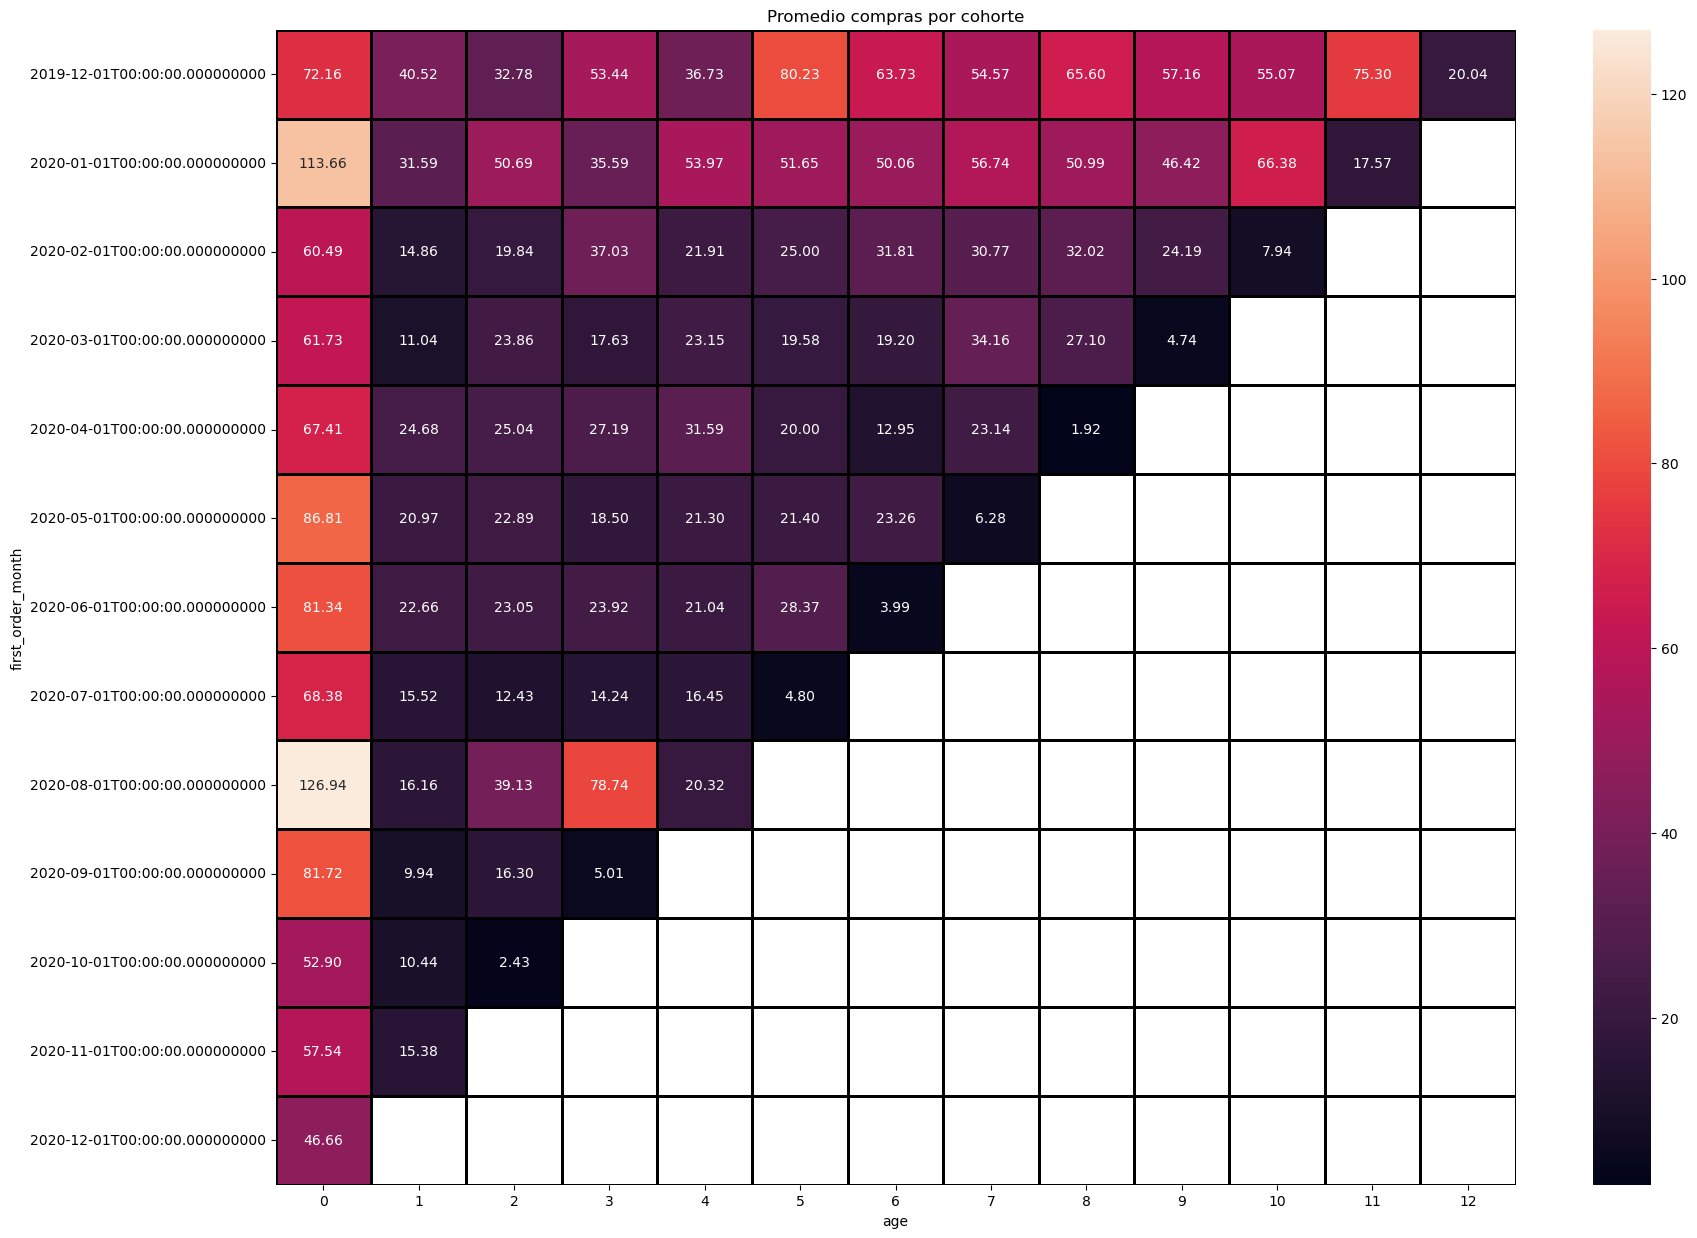

In [328]:
#Agregmos grafica heatmap para mejorar la visualizaición y evaluar el redimeinto de las cohortes y poder sacar conclusiones para cada mes
plt.figure(figsize=(20, 15))
plt.title('Promedio compras por cohorte')
sns.heatmap(
    output2,
    annot=True,
    fmt='.2f',
    linewidths=1,
    linecolor='black',
)
plt.show()

Filtrando los prodcutos que tienen mayor rotación, de acuerdo  a las categorias más venidas, vemos que a partir del segundo mes, los ingresos por cliente siguen fluctuando bastante, por lo que el comportamiento general de los clientes es igual que los clientes que compran los de las categorias más populares.